## Project - Predict the estimated time of arrival (ETA) for motorbike deliveries in Nairobi

### Background

Sendy was a logistics and fulfillment startup that provided services such as on-demand delivery, freight, warehousing, and fulfillment services to businesses and individuals.

It operated primarily in africa, with a huge presence in Kenya. Its main services included Sendy Transport, Sendy Freight, and Sendy Supply. 

It set itself apart by embedding technology to streamline its logistics processes. Most importantly, it used data analytics to improve operational efficiency and customer satisfaction.

The company, however, announced closure in August 2023 embarking on asset sales after being in existent since 2015.

### Project Objective

The primary objective of this project is to develop a predictive model that estimates the time of arrival (ETA) for orders placed on the Sendy platform. 

The ETA prediction will cover the period from pick-up to drop-off. The dataset provided by Sendy includes detailed order information and rider metrics based on orders made using Sendy's API, web, and mobile applications. 

These platforms connect customers with vetted transporters, offering route optimization and efficient dispatching of orders.

### Data Exploration and Preprocessing

In [106]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Gradient boosting libraries
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Optional: for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
# Load the Train data
TrainData = pd.read_csv('datasets/Train.csv')

TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [108]:
# Load the Test data
TestData = pd.read_csv('datasets/Test.csv')

TestData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [109]:
# Load the Riders data
RidersData = pd.read_csv('datasets/Riders.csv')

RidersData.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [110]:
# TrainData - Dataset information

TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [111]:
# Test Data - Dataset information

TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [112]:
# RidersData - Dataset information

RidersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [113]:
# Missing values - TrainData

TrainData.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [114]:
# Percentage of missing values - TrainData

round(TrainData.isnull().sum() / len(TrainData) * 100, 2)

Order No                                      0.00
User Id                                       0.00
Vehicle Type                                  0.00
Platform Type                                 0.00
Personal or Business                          0.00
Placement - Day of Month                      0.00
Placement - Weekday (Mo = 1)                  0.00
Placement - Time                              0.00
Confirmation - Day of Month                   0.00
Confirmation - Weekday (Mo = 1)               0.00
Confirmation - Time                           0.00
Arrival at Pickup - Day of Month              0.00
Arrival at Pickup - Weekday (Mo = 1)          0.00
Arrival at Pickup - Time                      0.00
Pickup - Day of Month                         0.00
Pickup - Weekday (Mo = 1)                     0.00
Pickup - Time                                 0.00
Arrival at Destination - Day of Month         0.00
Arrival at Destination - Weekday (Mo = 1)     0.00
Arrival at Destination - Time  

In [115]:
# Missing values - TestData

TestData.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [116]:
# Percentage of missing values - TestData

round(TestData.isnull().sum() / len(TestData) * 100, 2)

Order No                                 0.00
User Id                                  0.00
Vehicle Type                             0.00
Platform Type                            0.00
Personal or Business                     0.00
Placement - Day of Month                 0.00
Placement - Weekday (Mo = 1)             0.00
Placement - Time                         0.00
Confirmation - Day of Month              0.00
Confirmation - Weekday (Mo = 1)          0.00
Confirmation - Time                      0.00
Arrival at Pickup - Day of Month         0.00
Arrival at Pickup - Weekday (Mo = 1)     0.00
Arrival at Pickup - Time                 0.00
Pickup - Day of Month                    0.00
Pickup - Weekday (Mo = 1)                0.00
Pickup - Time                            0.00
Distance (KM)                            0.00
Temperature                             20.33
Precipitation in millimeters            97.18
Pickup Lat                               0.00
Pickup Long                       

Both the Test and Train datasets have missing values in the Temperature and Precipitation columns. The Riders Dataset seems to have 100% complete data. We will handle the missing values in the next phase.

In both Train and Test datasets, we assume that the missing values in precipitation column is that no precipitation occurred at that time. Therefore, the missing values are filled with 0. 

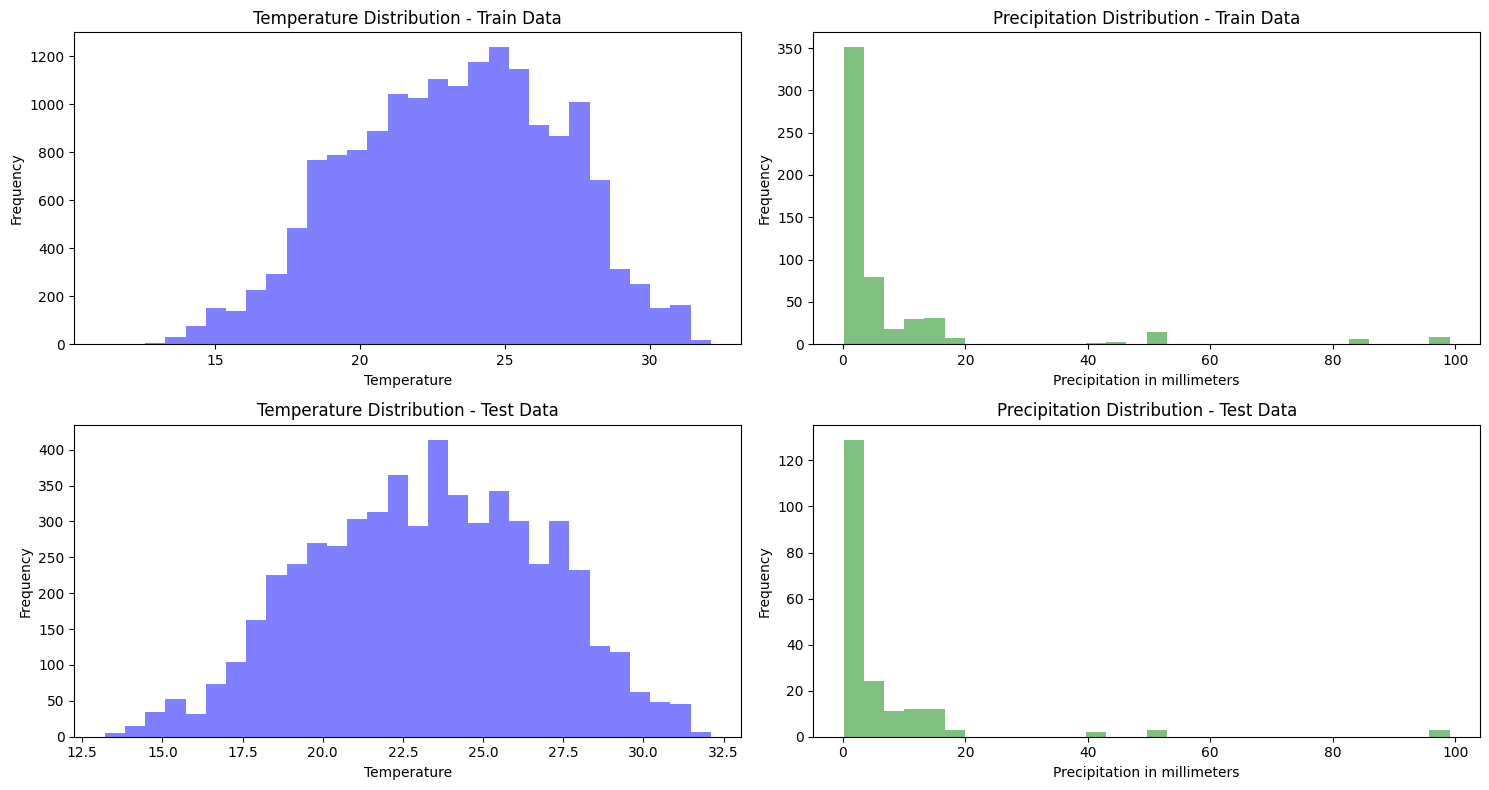

In [117]:
# Temperature and Precipitation Distribution

# Function to plot temperature and precipitation distributions
def plot_temp_precip(axes, data, col, bins, color, title, xlabel, ylabel):
    axes.hist(data[col], bins = bins, color = color, alpha = 0.5)
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)

fig, axes = plt.subplots(2, 2, figsize = (15, 8))

plot_temp_precip(axes[0, 0], TrainData, 'Temperature', 30, 'blue', 'Temperature Distribution - Train Data', 'Temperature', 'Frequency')
plot_temp_precip(axes[0, 1], TrainData, 'Precipitation in millimeters', 30, 'green', 'Precipitation Distribution - Train Data', 'Precipitation in millimeters', 'Frequency')
plot_temp_precip(axes[1, 0], TestData, 'Temperature', 30, 'blue', 'Temperature Distribution - Test Data', 'Temperature', 'Frequency')
plot_temp_precip(axes[1, 1], TestData, 'Precipitation in millimeters', 30, 'green', 'Precipitation Distribution - Test Data', 'Precipitation in millimeters', 'Frequency')

plt.tight_layout()
plt.show()

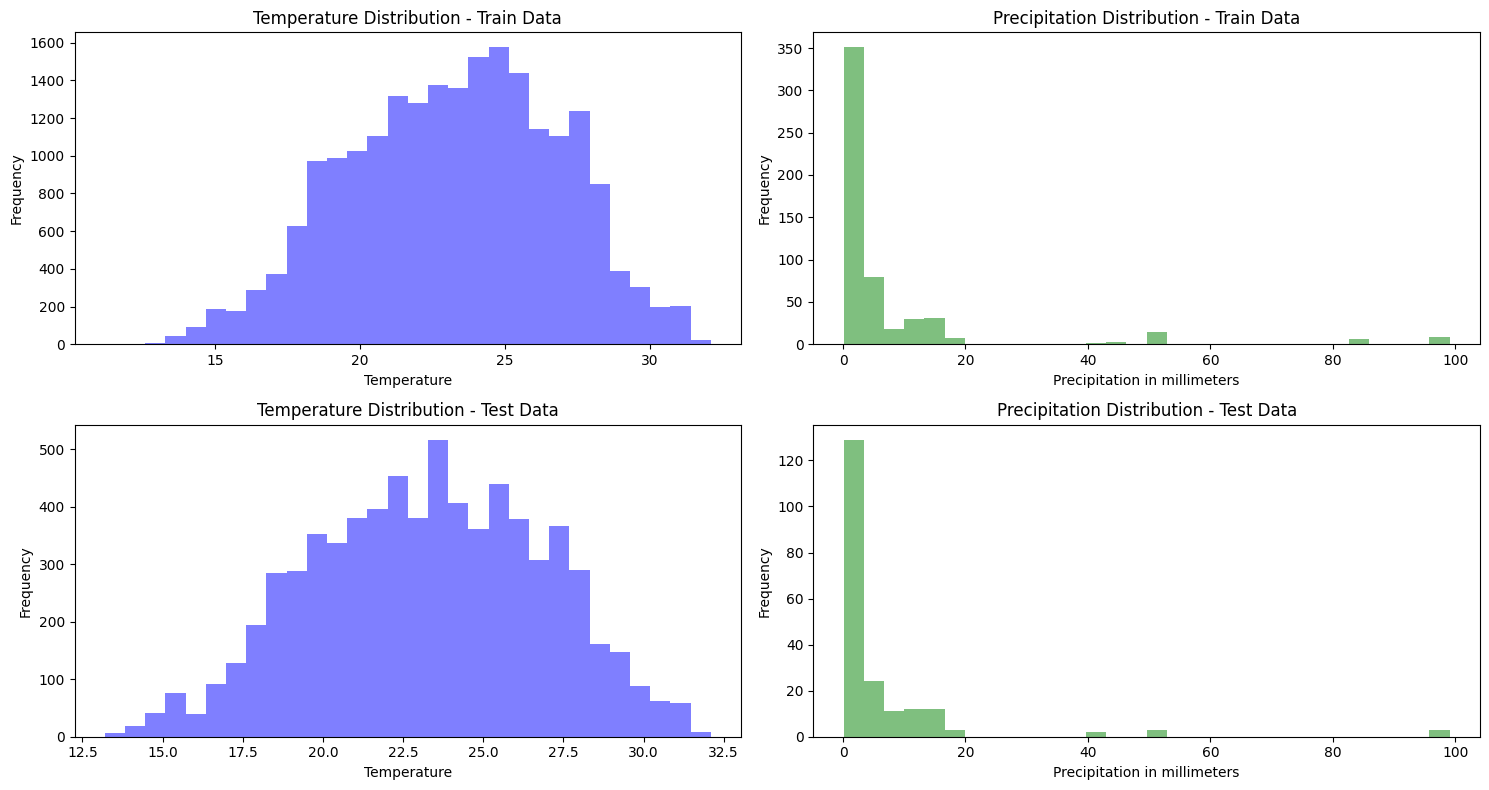

In [118]:
# Using forward fill to impute missing values in the Temperature column
def ffill_bfill(df, col):
    df[col] = df[col].ffill().bfill()
    
ffill_bfill(TrainData, 'Temperature')
ffill_bfill(TestData, 'Temperature')

# Plot temperature and precipitation distributions
fig, axes = plt.subplots(2, 2, figsize = (15, 8))

plot_temp_precip(axes[0, 0], TrainData, 'Temperature', 30, 'blue', 'Temperature Distribution - Train Data', 'Temperature', 'Frequency')
plot_temp_precip(axes[0, 1], TrainData, 'Precipitation in millimeters', 30, 'green', 'Precipitation Distribution - Train Data', 'Precipitation in millimeters', 'Frequency')
plot_temp_precip(axes[1, 0], TestData, 'Temperature', 30, 'blue', 'Temperature Distribution - Test Data', 'Temperature', 'Frequency')
plot_temp_precip(axes[1, 1], TestData, 'Precipitation in millimeters', 30, 'green', 'Precipitation Distribution - Test Data', 'Precipitation in millimeters', 'Frequency')

plt.tight_layout()
plt.show()

Next, I will add a new column - RainToday From the Precipitation column - If the precipitation column has a value greater than 0, then it rained that day, else it did not rain.

In [119]:
def rain_today(df, precipitation_col, new_col = 'RainToday'):
    df[new_col] = np.where(df[precipitation_col] > 0, 'Yes', 'No')
    
rain_today(TrainData, 'Precipitation in millimeters')
rain_today(TestData, 'Precipitation in millimeters')

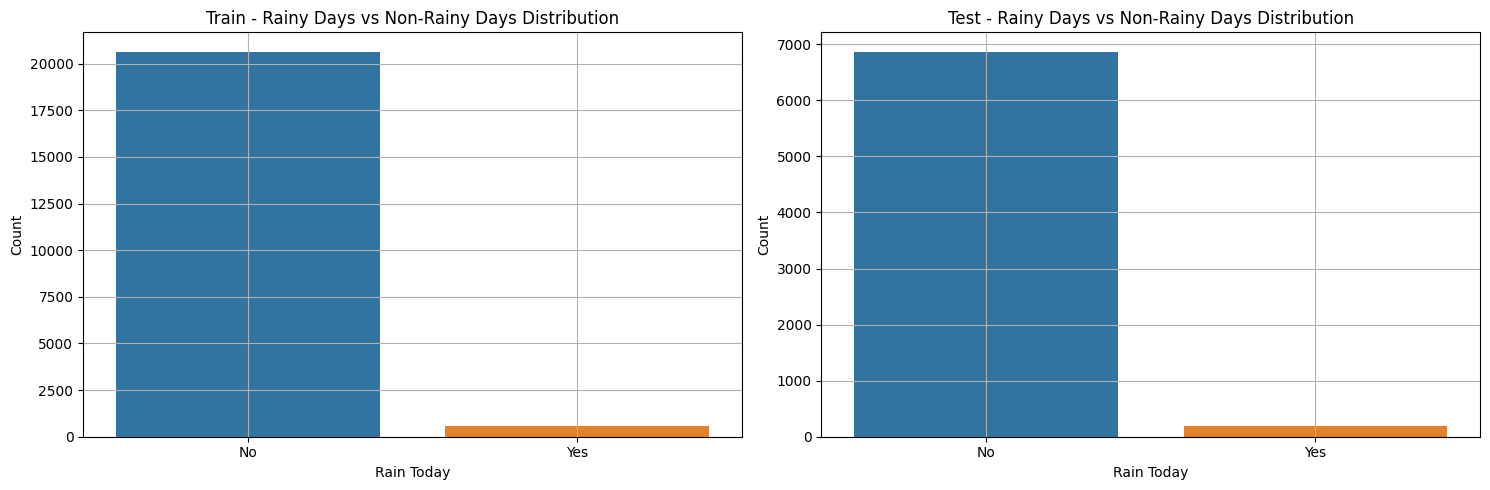

In [120]:
# Inspecting distribution of rainy and non-rainy days.

# Create subplots
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# Function to plot in both Test and Train Data
def plot_rain_distribution(axes, data, title):
    sns.countplot(data = data, x = 'RainToday', hue = 'RainToday', ax = axes, dodge = False)
    axes.set_title(title)
    axes.set_xlabel('Rain Today')
    axes.set_ylabel('Count')
    axes.grid(True)

# Plot
plot_rain_distribution(axes[0], TrainData, 'Train - Rainy Days vs Non-Rainy Days Distribution')
plot_rain_distribution(axes[1], TestData, 'Test - Rainy Days vs Non-Rainy Days Distribution')

plt.tight_layout()

plt.show()

There were few rainy days, as extracted from the precipitation column.

In [121]:
TrainData.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [122]:
TestData.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                                0
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [123]:
# Duplicated values

def is_duplicated(df):
    df.duplicated()

# Train data
duplicates = is_duplicated(TrainData)

print(duplicates)

None


In [124]:
# Test data duplicates

duplicates_test = is_duplicated(TestData)

print(duplicates_test)

None


In [125]:
# Riders data duplicates

duplicates_riders = is_duplicated(RidersData)

print(duplicates_riders)

None


In [126]:
# Data Description

TrainData['Time from Pickup to Arrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

In [127]:
#TrainData.to_csv("datasets/TrainData.csv", index=False)
#TestData.to_csv("datasets/TestData.csv", index=False)

### Data Enrichment

In this project, data enrichment is performed using custom scripts in the src/ folder, each dedicated to extracting specific features from geographic data sources. These scripts generate features like shortest path distances, road types, and road quality, enhancing our dataset with valuable contextual information for predicting estimated time of arrival (ETA). The main.py script orchestrates this process, consolidating all enriched features into a final dataset for analysis and modeling.

In [128]:
TrainData = pd.read_csv('processed_data/processed_TrainData.csv')

TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,RainToday,Road Quality,Pickup Road Type,Shortest Path Distance
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,No,paved,residential,2946.188476
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,No,paved,tertiary,15641.876501
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,No,paved,secondary,2879.941558
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,No,paved,secondary,6204.451859
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,No,paved,residential,6131.892516


In [129]:
TrainData.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'RainToday', 'Road Quality',
       'Pickup Road Type', 'Shortest Path Distance'],
      dtype='object')

In [130]:
TestData = pd.read_csv('processed_data/processed_TestData.csv')

TestData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,RainToday,Road Quality,Pickup Road Type,Shortest Path Distance
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,No,unknown,trunk_link,7504.656523
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,No,paved,residential,5258.208365
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,No,paved,secondary,4654.147035
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,No,paved,secondary,3474.872462
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,No,paved,trunk,3638.844860


In [131]:
TestData.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'RainToday', 'Road Quality', 'Pickup Road Type',
       'Shortest Path Distance'],
      dtype='object')

In [132]:
TrainData[['Order No', 'Shortest Path Distance', 'Pickup Road Type', 'Road Quality']].head()

,Order No,Shortest Path Distance,Pickup Road Type,Road Quality
0,Order_No_4211,2946.188476,residential,paved
1,Order_No_25375,15641.876501,tertiary,paved
2,Order_No_1899,2879.941558,secondary,paved
3,Order_No_9336,6204.451859,secondary,paved
4,Order_No_27883,6131.892516,residential,paved


In [133]:
TestData[['Order No', 'Shortest Path Distance', 'Pickup Road Type', 'Road Quality']].head()

,Order No,Shortest Path Distance,Pickup Road Type,Road Quality
0,Order_No_19248,7504.656523,trunk_link,unknown
1,Order_No_12736,5258.208365,residential,paved
2,Order_No_768,4654.147035,secondary,paved
3,Order_No_15332,3474.872462,secondary,paved
4,Order_No_21373,3638.844860,trunk,paved


### Exploratory Data Analysis

array([[<Axes: title={'center': 'Platform Type'}>,
        <Axes: title={'center': 'Placement - Day of Month'}>,
        <Axes: title={'center': 'Placement - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Confirmation - Day of Month'}>],
       [<Axes: title={'center': 'Confirmation - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Arrival at Pickup - Day of Month'}>,
        <Axes: title={'center': 'Arrival at Pickup - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Pickup - Day of Month'}>],
       [<Axes: title={'center': 'Pickup - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Arrival at Destination - Day of Month'}>,
        <Axes: title={'center': 'Arrival at Destination - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Distance (KM)'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Precipitation in millimeters'}>,
        <Axes: title={'center': 'Pickup Lat'}>,
        <Axes: title={'center': 'Pickup Long'}>],


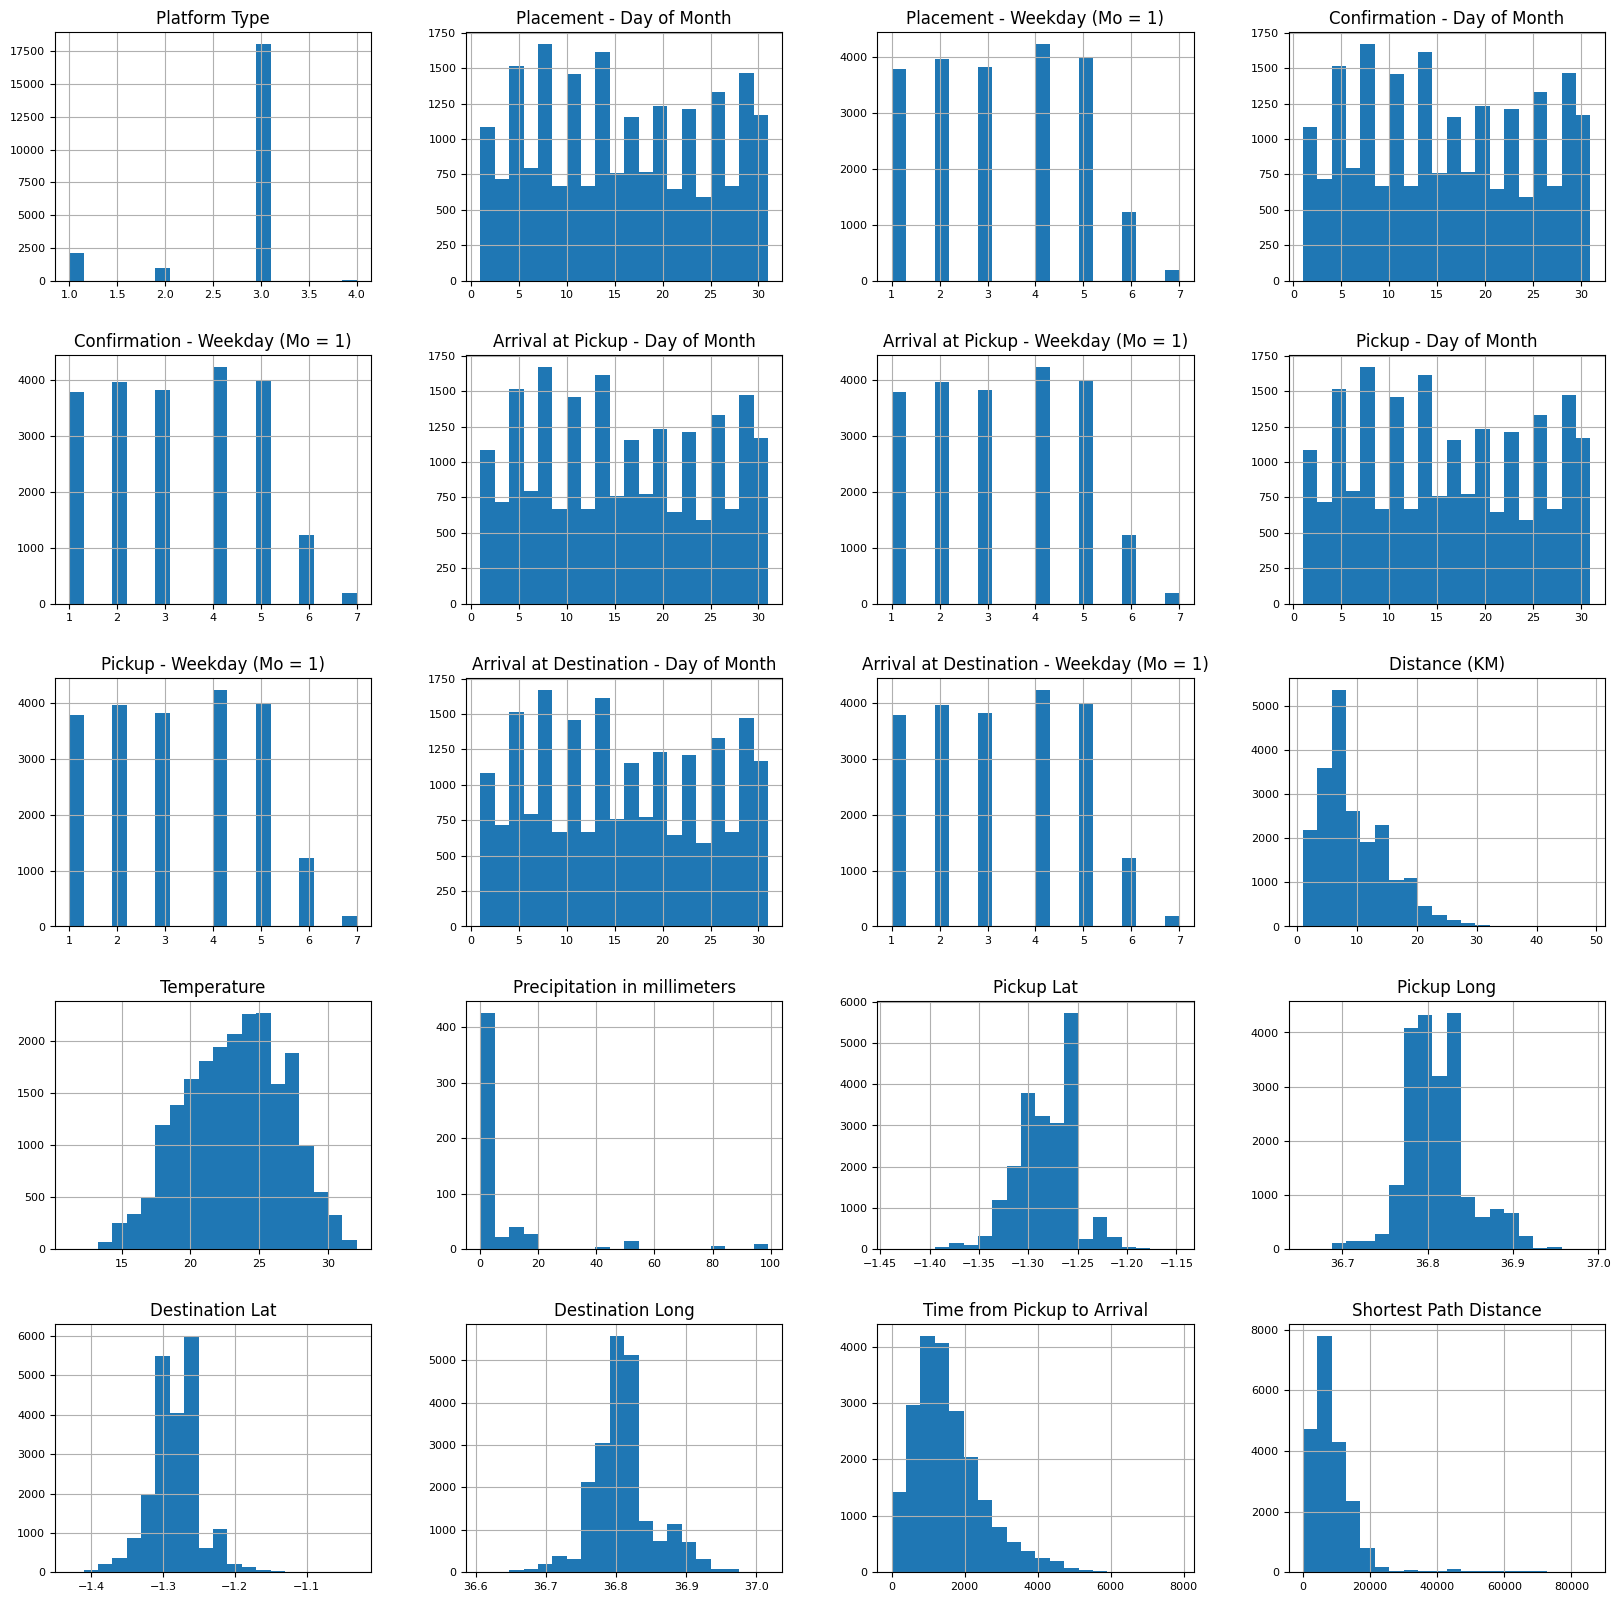

In [134]:
TrainData.hist(figsize = (20, 20), bins = 20, xlabelsize = 8, ylabelsize = 8)

The majority of orders are associated with Platform Type 3, while the other types have relatively low counts. Orders are distributed fairly evenly across the days of the month, with a slight variation in counts. There is a higher number of orders from Monday to Friday, with a drop on weekends, especially Sunday. Similar to placement, confirmation days are evenly distributed across the month. Confirmation follows a similar pattern to placement, with more confirmations on weekdays and a sharp drop on Sunday. The arrival days are evenly distributed, indicating consistent activity across the month. Arrival at pickup is higher on weekdays, with lower activity on Sundays. The distribution is relatively even, with orders picked up on most days of the month. Pickups are more frequent on weekdays, dropping on weekends, especially on Sunday. Similar distribution as previous day-of-month variables, showing activity across the month. Like other weekday variables, arrivals are more frequent from Monday to Friday, with fewer on weekends.

The majority of trips cover shorter distances, with a sharp decrease in frequency as distance increases. Most trips are under 10 km. Temperatures are centered around 25–30 degrees Celsius, indicating relatively warm weather. There is very low precipitation for most orders, but a few days show higher precipitation levels, indicating occasional rainy days. The time from pickup to arrival is skewed towards shorter durations, with most orders completed in under 2000 seconds. Similar to Distance (KM), most orders follow a short path, with a steep drop-off as the path distance increases.

- Activities like placement, confirmation, arrival, and pickup are evenly spread across the month, with more activity on weekdays.
- Both pickup and destination locations are concentrated within a certain latitude and longitude range.
- Most orders cover short distances and are completed relatively quickly, with a small subset covering longer distances and taking more time.
- The data shows mostly dry conditions with occasional rain, and temperatures are generally warm.

#### What time does it take to deliver an order?

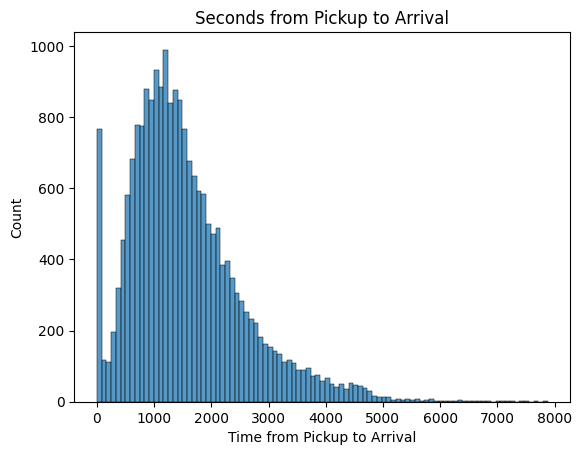

In [135]:
# Plotting the distribution of the target variable - Time from Pickup to Arrival

sns.histplot(data = TrainData, x = 'Time from Pickup to Arrival')

plt.title('Seconds from Pickup to Arrival')
plt.xlabel('Time from Pickup to Arrival')
plt.ylabel('Count')

plt.show()

There are instances where the time from pickup to arrival is 0 seconds. We will subset the data to further investigate these instances.

In [136]:
# Checking for instances where time is 0 seconds

zero_seconds = TrainData[TrainData['Time from Pickup to Arrival'] < 60]

zero_seconds[['Order No', 'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time', 'Time from Pickup to Arrival', 'Distance (KM)']].head()

,Order No,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Time from Pickup to Arrival,Distance (KM)
36,Order_No_9676,11:47:23 AM,1:01:54 PM,1:02:08 PM,1:35:48 PM,1:35:50 PM,2,4
52,Order_No_27809,4:16:05 PM,4:16:23 PM,5:10:03 PM,5:14:41 PM,5:14:45 PM,4,3
81,Order_No_4823,11:44:46 AM,1:31:36 PM,1:32:02 PM,1:51:06 PM,1:51:20 PM,14,5
86,Order_No_23720,1:00:31 PM,1:00:50 PM,1:18:47 PM,1:47:23 PM,1:47:27 PM,4,4
126,Order_No_6027,12:41:58 PM,12:48:50 PM,1:09:15 PM,1:23:54 PM,1:24:10 PM,16,4


We try to check for speeds using the distance and time from pickup to arrival.

In [137]:
TrainData['Time from Pickup to Arrival (Minutes)'] = TrainData['Time from Pickup to Arrival'] / 60

TrainData['Speed'] = (TrainData['Distance (KM)'] / TrainData['Time from Pickup to Arrival']) * 3600

TrainData['Speed'].describe()

count    21201.000000
mean       249.305379
std       1905.297307
min          0.920245
25%         16.463415
50%         23.064602
75%         30.288462
max      61200.000000
Name: Speed, dtype: float64

There are unrealistic speeds in the data. However, we have most rides occuring at realistic speeds (with the 25th, 50th, and 75th percentiles between roughly 16 and 30 km/h).

In [138]:
TrainData[['Order No', 'Distance (KM)', 'Time from Pickup to Arrival (Minutes)', 'Speed']].head(10)

,Order No,Distance (KM),Time from Pickup to Arrival (Minutes),Speed
0,Order_No_4211,4,12.416667,19.328859
1,Order_No_25375,16,33.216667,28.901154
2,Order_No_1899,3,7.583333,23.736264
3,Order_No_9336,9,22.350000,24.161074
4,Order_No_27883,9,20.233333,26.688633
5,Order_No_7408,9,53.183333,10.153557
6,Order_No_22680,5,23.000000,13.043478
7,Order_No_21578,3,10.766667,16.718266
8,Order_No_5234,9,56.633333,9.535021
9,Order_No_1768,14,57.316667,14.655423


Here, we will remove speeds that are ideally above unrealistic speeds. The median speed is 23 km/h which is a realistic speed for a motorbike in Nairobi.

In [139]:
# Subsetting the data to check for extreme outliers

Q1 = TrainData['Speed'].quantile(0.25)
Q3 = TrainData['Speed'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

TrainData = TrainData[(TrainData['Speed'] >= lower_bound) & (TrainData['Speed'] <= upper_bound)]

print('Filtered data count:', len(TrainData))

Filtered data count: 19953


In [140]:
TrainData['Speed'].describe()

count    19953.000000
mean        22.729718
std          9.296532
min          0.920245
25%         15.980630
50%         22.281167
75%         28.656716
max         51.012146
Name: Speed, dtype: float64

#### Hypothesis 1: Orders placed during peak traffic hours or on busy weekdays result in longer ETAs even when accounting for route distance.

In [141]:
# Convert date-time columns to datetime objects in the train dataset
datetime_columns = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']
for col in datetime_columns:
    if col in TrainData.columns:
        TrainData.loc[:, col] = pd.to_datetime(TrainData[col], format = '%I:%M:%S %p').dt.time

# Convert date-time columns to datetime objects in the test dataset
datetime_columns_test = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']
for col in datetime_columns_test:
    if col in TestData.columns:
        TestData.loc[:, col] = pd.to_datetime(TestData[col], format = '%I:%M:%S %p').dt.time

In [142]:
# Generate hour features for the train dataset
for col in datetime_columns:
    if col in TrainData.columns:
        TrainData.loc[:, col + ' Hour'] = pd.to_datetime(TrainData[col], format = '%H:%M:%S').dt.hour
        
# Generate hour features for the test dataset
for col in datetime_columns_test:
    if col in TestData.columns:
        TestData.loc[:, col + ' Hour'] = pd.to_datetime(TestData[col], format = '%H:%M:%S').dt.hour

Here, we will remove rows where earlier time is greater than later time. For example, if the placement time is greater than the confirmation time, we will remove such rows.

In [143]:
# Checking and removing instances where the earlier time is greater than the later time

inconsistent_times = TrainData[
    (TrainData['Placement - Time'] > TrainData['Confirmation - Time']) |
    (TrainData['Confirmation - Time'] > TrainData['Arrival at Pickup - Time']) |
    (TrainData['Arrival at Pickup - Time'] > TrainData['Pickup - Time']) |
    (TrainData['Pickup - Time'] > TrainData['Arrival at Destination - Time'])
]

print('Inconsistent times count:', len(inconsistent_times))

Inconsistent times count: 6


In [144]:
# Remove inconsistent times

TrainData = TrainData[~TrainData['Order No'].isin(inconsistent_times['Order No'])]

In [145]:
TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Road Quality,Pickup Road Type,Shortest Path Distance,Time from Pickup to Arrival (Minutes),Speed,Placement - Time Hour,Confirmation - Time Hour,Arrival at Pickup - Time Hour,Pickup - Time Hour,Arrival at Destination - Time Hour
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,09:35:46,9,5,...,paved,residential,2946.188476,12.416667,19.328859,9,9,10,10,10
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16,12,5,...,paved,tertiary,15641.876501,33.216667,28.901154,11,11,11,11,12
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25,30,2,...,paved,secondary,2879.941558,7.583333,23.736264,12,12,12,12,13
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,09:25:34,15,5,...,paved,secondary,6204.451859,22.350000,24.161074,9,9,9,9,10
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,09:55:18,13,1,...,paved,residential,6131.892516,20.233333,26.688633,9,9,10,10,10


In [146]:
TrainData[['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time']].head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
0,09:35:46,09:40:10,10:04:47,10:27:30,10:39:55
1,11:16:16,11:23:21,11:40:22,11:44:09,12:17:22
2,12:39:25,12:42:44,12:49:34,12:53:03,13:00:38
3,09:25:34,09:26:05,09:37:56,09:43:06,10:05:27
4,09:55:18,09:56:18,10:03:53,10:05:23,10:25:37


In [147]:
# Extract coordinates
pickup_coords = TrainData[['Pickup Lat', 'Pickup Long']].copy()
dropoff_coords = TrainData[['Destination Lat', 'Destination Long']].copy()

# Function to identify geographical clusters
def identify_geo_clusters(coords_df, n_clusters=5):
    # Remove rows with missing coordinates
    coords_df = coords_df.dropna()
    
    # Standardize the coordinates
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans

    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords_df)
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(coords_scaled)
    
    # Add cluster labels to the original data
    coords_df['Cluster'] = kmeans.labels_
    
    # Calculate cluster centers
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    cluster_center_df = pd.DataFrame(cluster_centers, columns=coords_df.columns[:-1])
    cluster_center_df['Cluster'] = range(n_clusters)
    
    return coords_df, cluster_center_df

# Identify clusters for pickup and dropoff locations
pickup_clusters, pickup_centers = identify_geo_clusters(pickup_coords, n_clusters=5)
dropoff_clusters, dropoff_centers = identify_geo_clusters(dropoff_coords, n_clusters=5)

# Add cluster labels to original data
TrainData['Pickup_Cluster'] = pickup_clusters['Cluster']
TrainData['Dropoff_Cluster'] = dropoff_clusters['Cluster']

In [148]:
# Getting rush hour periods

def categorize_time(hour):
    if 6 <= hour < 10:
        return 'Morning Rush (6-10)'
    elif 10 <= hour < 15:
        return 'Midday (10-15)'
    elif 15 <= hour < 19:
        return 'Evening Rush (15-19)'
    else:
        return 'Night/Early Morning'

In [149]:
# Relationship between Rush hour and Time from Pickup to Arrival

# Add time of day category
if 'Pickup - Time Hour' in TrainData.columns:
    TrainData['Time_Category'] = TrainData['Pickup - Time Hour'].apply(categorize_time)

elif 'Pickup - Time' in TrainData.columns:
    # If time is stored as a time object, extract hour
    TrainData['Pickup_Hour'] = pd.to_datetime(TrainData['Pickup - Time']).dt.hour
    TrainData['Time_Category'] = TrainData['Pickup_Hour'].apply(categorize_time)

In [150]:
# How delivery times vary by cluster and time of day
cluster_time_stats = TrainData.groupby(['Pickup_Cluster', 'Time_Category'])['Time from Pickup to Arrival'].agg(
    ['mean', 'median', 'std', 'count']).reset_index()

# Identify clusters with significant time-of-day variations
print("\nClusters with significant time-of-day variations in delivery times:")
for cluster in cluster_time_stats['Pickup_Cluster'].unique():
    cluster_data = cluster_time_stats[cluster_time_stats['Pickup_Cluster'] == cluster]
    max_median = cluster_data['median'].max()
    min_median = cluster_data['median'].min()
    variation = (max_median - min_median) / min_median * 100  # Percentage variation
    
    if variation > 20:  # Arbitrary threshold
        print(f"Cluster {cluster} has {variation:.2f}% variation in delivery times across different times of day")
        print(cluster_data[['Time_Category', 'median', 'count']].sort_values('median', ascending=False))
        print()


Clusters with significant time-of-day variations in delivery times:
Cluster 4 has 33.82% variation in delivery times across different times of day
           Time_Category  median  count
17        Midday (10-15)  1543.0   1671
18   Morning Rush (6-10)  1509.5    288
16  Evening Rush (15-19)  1481.0    825
19   Night/Early Morning  1153.0     63



This analysis identifies Cluster 2 as a "congestion-sensitive zone" that would benefit most from time-of-day based optimization strategies. The dramatic improvement in delivery times during night/early morning hours suggests that this area's delivery challenges are heavily influenced by traffic or time-related factors rather than just distance or road quality.

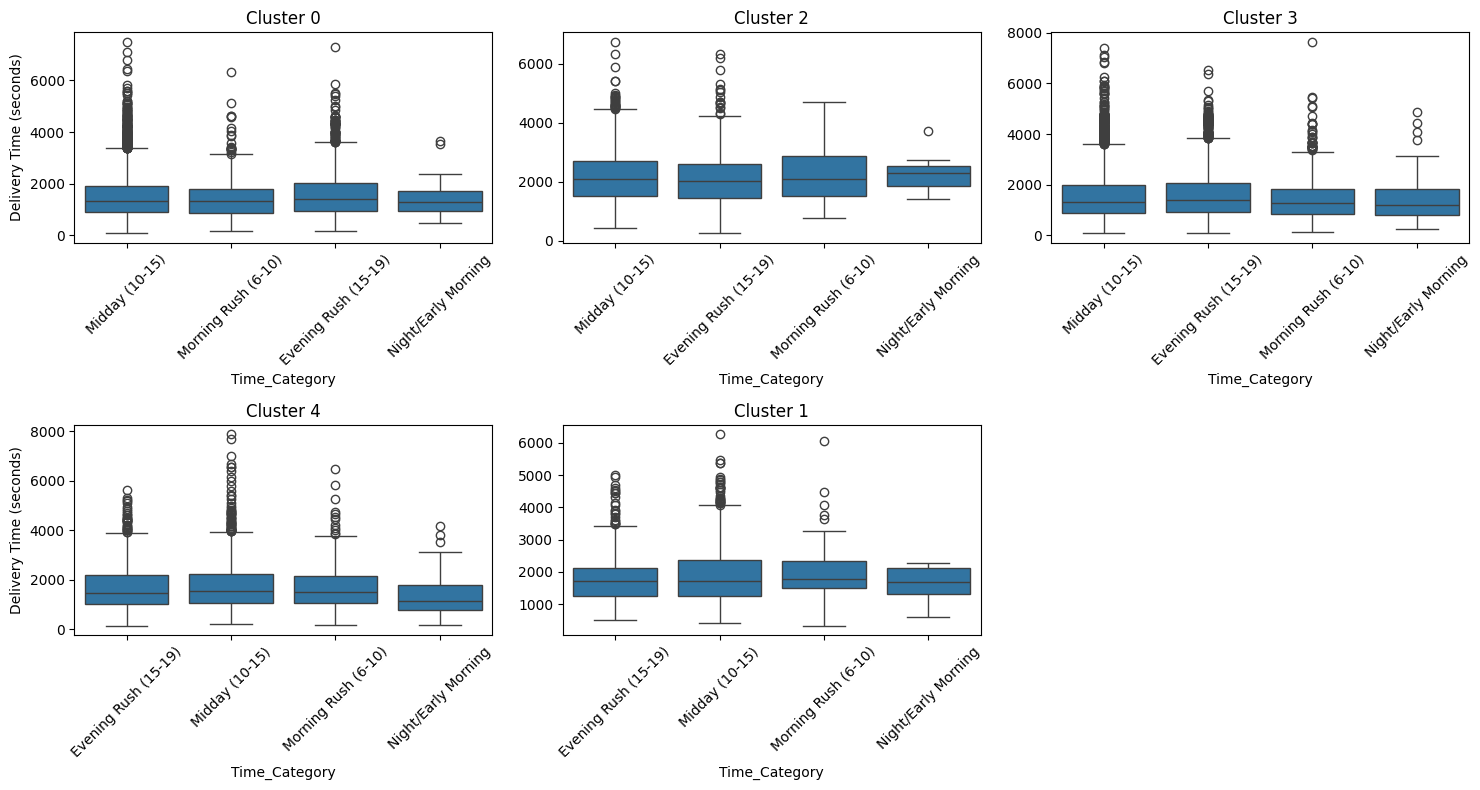

In [151]:
plt.figure(figsize = (15, 8))
for i, cluster in enumerate(TrainData['Pickup_Cluster'].unique()):
    cluster_data = TrainData[TrainData['Pickup_Cluster'] == cluster]
    
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Time_Category', y='Time from Pickup to Arrival', data=cluster_data)
    plt.title(f'Cluster {cluster}')
    plt.xticks(rotation=45)
    if i % 3 == 0:
        plt.ylabel('Delivery Time (seconds)')
    else:
        plt.ylabel('')
        
plt.tight_layout()
plt.show()

The bulkier of the orders are done during daytime hours with few orders occurring late night or night periods. Delivery takes less time during the night. Orders placed during the day take longer to deliver compared to those placed at night.

#### Hypothesis 2: Adverse weather conditions (e.g., heavy precipitation or extreme temperatures) lead to increased travel times compared to mild conditions.

In [152]:
weather_stats = TrainData.groupby('RainToday')['Time from Pickup to Arrival'].agg(
    median = 'median',
    mean = 'mean',
    std = 'std',
    count = 'count'
).reset_index()

print(weather_stats)

  RainToday  median         mean         std  count
0        No  1426.0  1641.268064  952.926709  19417
1       Yes  1436.0  1636.560377  928.761344    530


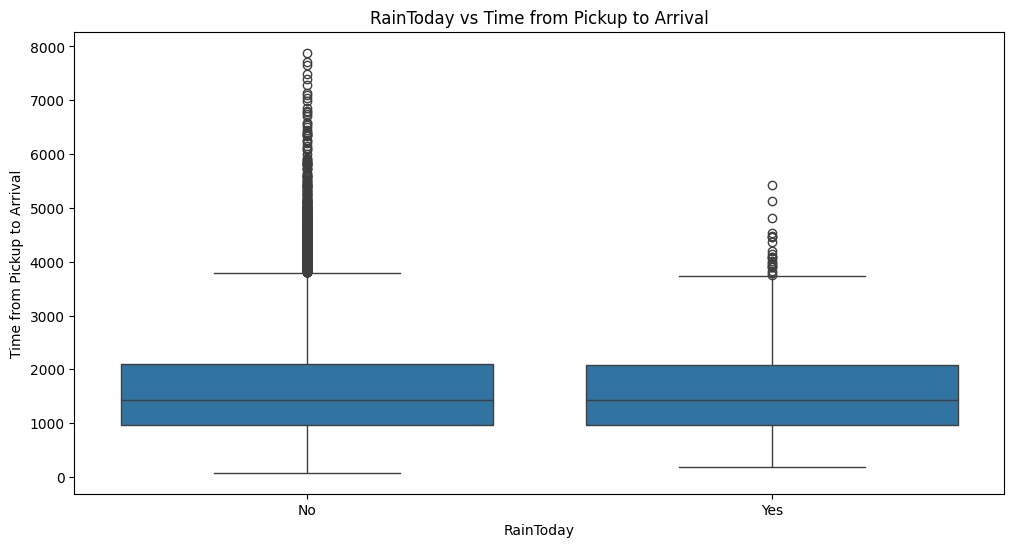

In [153]:
# Comparison of the distribution of delivery times on rainy vs. non-rainy days

plt.figure(figsize = (12, 6))

sns.boxplot(data = TrainData, x = 'RainToday', y = 'Time from Pickup to Arrival')

plt.title('RainToday vs Time from Pickup to Arrival')

plt.show()

Rainy days have a slightly higher median in delivery time compared to non-rainy days. 

In [154]:
TrainData['Temperature'].describe()

count    19947.000000
mean        23.204908
std          3.611452
min         11.200000
25%         20.500000
50%         23.400000
75%         25.900000
max         32.100000
Name: Temperature, dtype: float64

In [155]:
# Temperature effect on delivery time

bins_temp = [TrainData['Temperature'].min(), 18, 25, TrainData['Temperature'].max()] 
labels = ['Cold', 'Moderate', 'Hot']

TrainData['Temperature Category'] = pd.cut(TrainData['Temperature'], bins = bins_temp, labels = labels, right = False)

temp_stats = TrainData.groupby('Temperature Category')['Time from Pickup to Arrival'].agg(
    median = 'median',
    mean = 'mean',
    std = 'std',
    count = 'count'
).reset_index()

print(temp_stats)

  Temperature Category  median         mean         std  count
0                 Cold  1386.0  1574.474098  887.780913   1525
1             Moderate  1423.5  1637.507197  954.488006  11672
2                  Hot  1444.0  1662.190511  961.656939   6745


/tmp/ipykernel_9062/1038427646.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_stats = TrainData.groupby('Temperature Category')['Time from Pickup to Arrival'].agg(


We proceed to check whether adverse weather might worsen delivery times more on certain road types or quality levels. For example, roads with lower quality might see a greater slowdown when it rains.

In [156]:
rain_road = TrainData.groupby(['RainToday', 'Road Quality'])['Time from Pickup to Arrival'].median().reset_index()

print(rain_road)

  RainToday Road Quality  Time from Pickup to Arrival
0        No        paved                       1412.0
1        No      unknown                       1483.0
2        No      unpaved                       1524.5
3       Yes        paved                       1454.0
4       Yes      unknown                       1259.0
5       Yes      unpaved                       1289.5


On aggregate, using the RainToday binary variable alone, there is little evidence that rain is increasing delivery times.

However, given that only about 2.6% (531 out of 19,953) of the data indicate rainy days, this overall effect might be “washed out” when not considering context.

There is a gradual increase in median delivery times as temperature increases from Cold to Hot. Although the differences are modest (roughly 60 seconds between Cold and Hot), this trend suggests that higher temperatures might be associated with longer delivery times.

The data supports the hypothesis—rain increases delivery times on paved (typically urban) roads. For Unknown/Unpaved Roads, the effect of rain is not as expected; here, delivery times actually appear to be shorter when it rains. This suggests that the impact of adverse weather may be context-dependent and that other factors (such as the road’s location or priority rules for deliveries in those areas) might be at play.

Alternatively, drainage conditions, which are quite a problem in Nairobi may contribute to delays on even paved roads on rainy days.

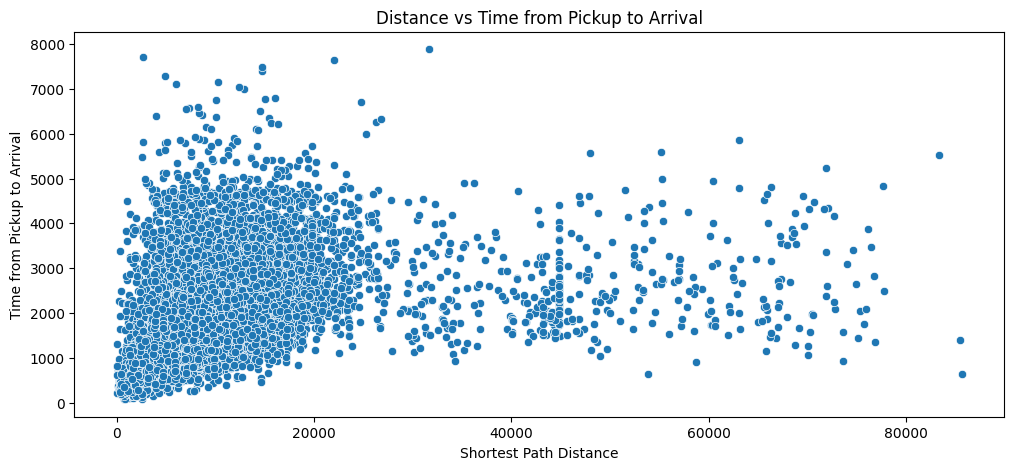

In [157]:
# Relationship between distance and time from pickup to arrival

plt.figure(figsize = (12, 5))

sns.scatterplot(data = TrainData, x = 'Shortest Path Distance', y = 'Time from Pickup to Arrival')

plt.title('Distance vs Time from Pickup to Arrival')

plt.show()

#### Hypothesis 3: Riders with higher experience or better performance metrics (such as a higher number of completed orders, better ratings, or longer ‘age’ in the system) deliver faster than less experienced riders.

In [158]:
# Joining the Train and Riders data

TrainData = pd.merge(TrainData, RidersData, on = 'Rider Id', how = 'left')

TrainData[['Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings', 'Time from Pickup to Arrival']].head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Rider_Id_432,1637,1309,13.8,549,745
1,Rider_Id_856,396,339,13.6,69,1993
2,Rider_Id_155,1023,242,12.5,114,455
3,Rider_Id_855,886,283,14.5,113,1341
4,Rider_Id_770,2311,872,14.1,533,1214


In [159]:
TrainData['Average_Rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19947 entries, 0 to 19946
Series name: Average_Rating
Non-Null Count  Dtype  
--------------  -----  
19947 non-null  float64
dtypes: float64(1)
memory usage: 156.0 KB


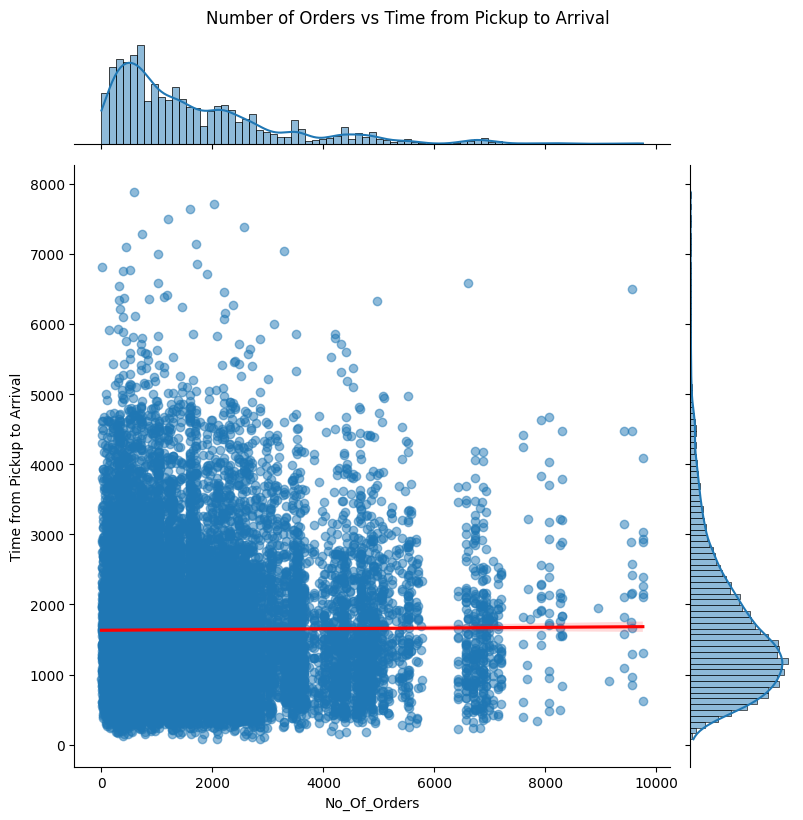

In [160]:
# Relationship between number of orders and time from pickup to arrival

sns.jointplot(
    data = TrainData, 
    x = 'No_Of_Orders', 
    y = 'Time from Pickup to Arrival', 
    kind = 'reg',        # 'reg' fits a regression line
    height = 8,          # Adjusts the size of the plot
    scatter_kws = {'alpha': 0.5},
    line_kws = {'color': 'red'}
)
plt.suptitle('Number of Orders vs Time from Pickup to Arrival', y = 1.02)

plt.show()

In [161]:
# Correlation analysis

corr_value = TrainData['No_Of_Orders'].corr(TrainData['Time from Pickup to Arrival'])

print('The Pearson Correlation Coefficient between Number of Orders and Time from Pickup to Arrival is:', corr_value)

The Pearson Correlation Coefficient between Number of Orders and Time from Pickup to Arrival is: 0.008318119734927744


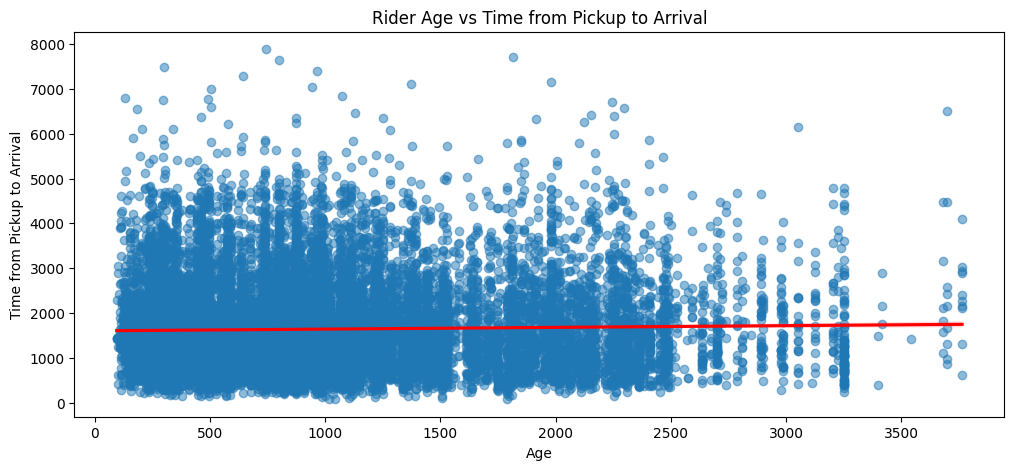

In [162]:
# Relationship between rider age and time from pickup to arrival

plt.figure(figsize = (12, 5))

sns.regplot(data = TrainData, x = 'Age', y = 'Time from Pickup to Arrival', scatter_kws = {'alpha': 0.5}, line_kws={'color': 'red'})

plt.title('Rider Age vs Time from Pickup to Arrival')

plt.show()

In [163]:
# Correlation analysis

corr_value = TrainData['Age'].corr(TrainData['Time from Pickup to Arrival'])

print('The Pearson Correlation Coefficient between Rider Age and Time from Pickup to Arrival is:', corr_value)

The Pearson Correlation Coefficient between Rider Age and Time from Pickup to Arrival is: 0.025751950036074264


In [164]:
TrainData['Average_Rating'].describe()

count    19947.000000
mean        13.893678
std          0.912841
min          0.000000
25%         13.700000
50%         14.000000
75%         14.300000
max         15.200000
Name: Average_Rating, dtype: float64

In [165]:
TrainData['Rating Group'] = pd.qcut(TrainData['Average_Rating'], q = 4, labels=['Low', 'Moderate', 'High', 'Very High'])

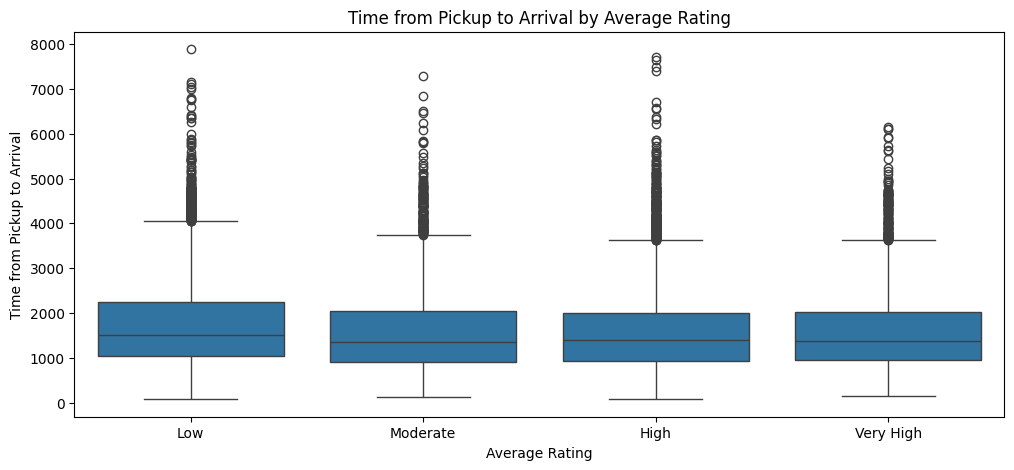

In [166]:
# Relationship between average rating and time from pickup to arrival

plt.figure(figsize = (12, 5))

sns.boxplot(data = TrainData, x = 'Rating Group', y = 'Time from Pickup to Arrival')

plt.title('Time from Pickup to Arrival by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Time from Pickup to Arrival')

plt.show()

In [167]:
# Statistics for ratings vs time from pickup to arrival

rating_stats = TrainData.groupby('Rating Group')['Time from Pickup to Arrival'].agg(
    median = 'median',
    mean = 'mean',
    std = 'std',
    count = 'count'
).reset_index()

print(rating_stats)

  Rating Group  median         mean          std  count
0          Low  1514.0  1748.146841  1000.722884   6347
1     Moderate  1354.0  1583.816932   949.580668   3638
2         High  1404.0  1591.173526   918.807656   6633
3    Very High  1388.0  1599.342445   908.515918   3329


/tmp/ipykernel_9062/2609599177.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_stats = TrainData.groupby('Rating Group')['Time from Pickup to Arrival'].agg(


In [168]:
# Create rider experience buckets

def create_experience_buckets(no_of_orders):
    if no_of_orders <= 50:
        return 'Beginner (≤50)'
    elif no_of_orders <= 100:
        return 'Intermediate (51-100)'
    elif no_of_orders <= 200:
        return 'Experienced (101-200)'
    else:
        return 'Expert (>200)'

TrainData['Experience_Bucket'] = TrainData['No_Of_Orders'].apply(create_experience_buckets)


In [169]:
# Calculate average delivery time per km to normalize for distance

TrainData['Delivery_Time_Per_KM'] = TrainData['Time from Pickup to Arrival'] / TrainData['Distance (KM)']

In [170]:
# Remove outliers in the Delivery_Time_Per_KM column
Q1 = TrainData['Delivery_Time_Per_KM'].quantile(0.25)
Q3 = TrainData['Delivery_Time_Per_KM'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
TrainData = TrainData[(TrainData['Delivery_Time_Per_KM'] >= lower_bound) & 
                              (TrainData['Delivery_Time_Per_KM'] <= upper_bound)]

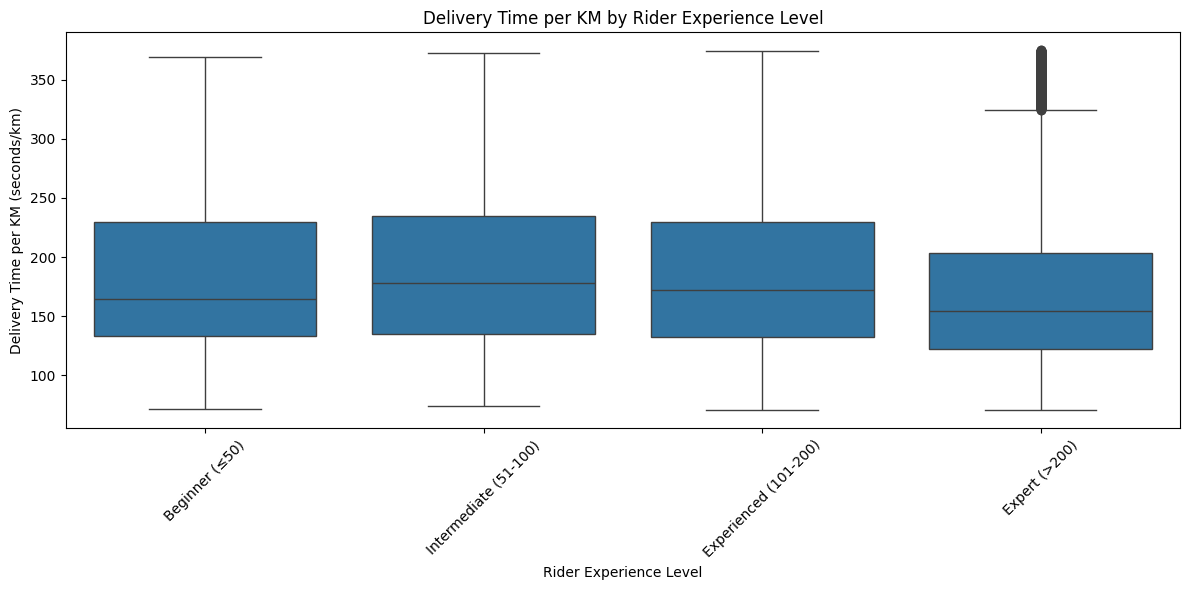

In [171]:
# Delivery time by experience bucket
plt.figure(figsize=(12, 6))

sns.boxplot(x='Experience_Bucket', y='Delivery_Time_Per_KM', data = TrainData, 
            order=['Beginner (≤50)', 'Intermediate (51-100)', 'Experienced (101-200)', 'Expert (>200)'])
plt.title('Delivery Time per KM by Rider Experience Level')
plt.xlabel('Rider Experience Level')
plt.ylabel('Delivery Time per KM (seconds/km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [172]:
# Calculate statistics for each experience bucket
experience_stats = TrainData.groupby('Experience_Bucket')['Delivery_Time_Per_KM'].agg(
    ['mean', 'median', 'std', 'count']).reset_index()
print("Delivery Time per KM by Rider Experience Level:")
print(experience_stats)

Delivery Time per KM by Rider Experience Level:
       Experience_Bucket        mean      median        std  count
0         Beginner (≤50)  184.189744  164.214286  68.561706    225
1  Experienced (101-200)  185.922161  171.800000  69.247563    799
2          Expert (>200)  169.828664  154.142857  64.621007  17161
3  Intermediate (51-100)  187.712884  177.714286  68.280573    268


In [173]:
# ANOVA to test for difference between groups
from sklearn.preprocessing import StandardScaler
from scipy import stats

groups = [TrainData[TrainData['Experience_Bucket'] == bucket]['Delivery_Time_Per_KM'].values
          for bucket in ['Beginner (≤50)', 'Intermediate (51-100)', 'Experienced (101-200)', 'Expert (>200)']]

f_statistic, p_value = stats.f_oneway(*groups)

print(f"\nANOVA results: F-statistic = {f_statistic:.4f}, p-value = {p_value:.4f}")


ANOVA results: F-statistic = 24.9388, p-value = 0.0000


There is a significant difference in the median delivery times between riders with different experience levels. We proceed to perform post-hoc tests to determine which groups differ from each other.

In [174]:
if p_value < 0.05:
    
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
    posthoc_data = pd.DataFrame({
        'Delivery_Time_Per_KM': TrainData['Delivery_Time_Per_KM'].values,
        'Experience_Bucket': TrainData['Experience_Bucket'].values
    })
    
    tukey_results = pairwise_tukeyhsd(
        posthoc_data['Delivery_Time_Per_KM'], 
                                     posthoc_data['Experience_Bucket'],
                                     alpha = 0.05)
    
    print("\nTukey's HSD Test Results:")
    print(tukey_results)


Tukey's HSD Test Results:
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                group2        meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------
       Beginner (≤50) Experienced (101-200)   1.7324 0.9849 -10.8582  14.3231  False
       Beginner (≤50)         Expert (>200) -14.3611 0.0054 -25.5555  -3.1667   True
       Beginner (≤50) Intermediate (51-100)   3.5231 0.9321 -11.5613  18.6075  False
Experienced (101-200)         Expert (>200) -16.0935    0.0 -22.1312 -10.0558   True
Experienced (101-200) Intermediate (51-100)   1.7907 0.9798  -9.9855  13.5669  False
        Expert (>200) Intermediate (51-100)  17.8842    0.0   7.6144   28.154   True
------------------------------------------------------------------------------------


Between the groups, we see some significant differences. In conclusion, the data supports the hypothesis that riders with more experience (as measured by the number of completed orders) tend to have shorter delivery times.

#### Does the day of the week affect the time taken for deliveries? For example, are delivery times longer or shorter on busier days like Thursday?

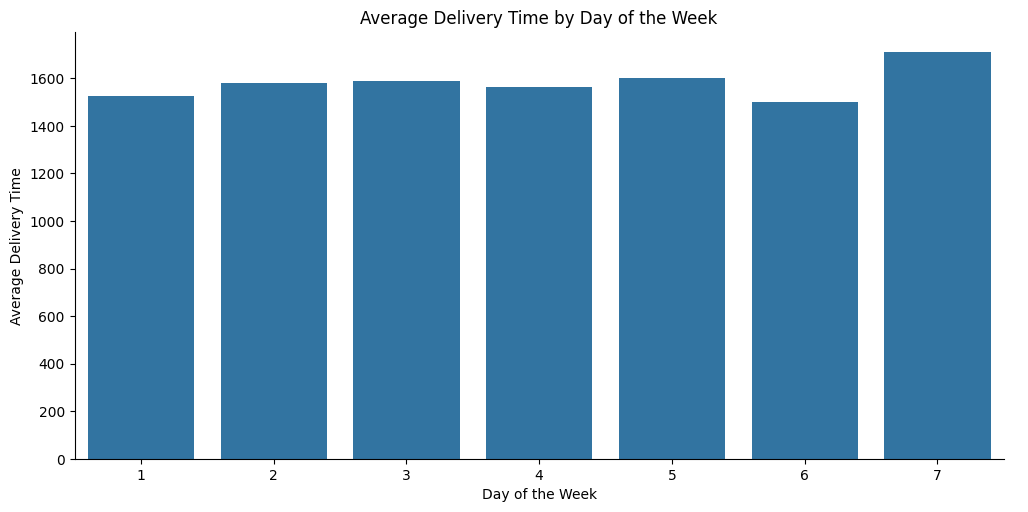

In [175]:
# What is the average delivery time for each day of the week?

# Group by the day of the week and calculate the average delivery time
avg_delivery_time = TrainData.groupby('Placement - Weekday (Mo = 1)')['Time from Pickup to Arrival'].mean()

sns.catplot(x = avg_delivery_time.index,
            y = avg_delivery_time.values,
            kind = 'bar',
            height = 5,
            aspect = 2)

plt.title('Average Delivery Time by Day of the Week')

plt.xlabel('Day of the Week')

plt.ylabel('Average Delivery Time')

plt.show()

In [176]:
avg_delivery_time

Placement - Weekday (Mo = 1)
1    1523.923423
2    1582.435718
3    1589.505435
4    1565.511749
5    1599.434443
6    1500.095853
7    1709.427746
Name: Time from Pickup to Arrival, dtype: float64

- Average delivery times are fairly consistent from Monday to Friday, with values ranging from approximately 1,496 seconds (Monday) to 1,595 seconds (Friday).

- Saturday has the shortest average delivery time at 1,445.69 seconds, likely due to the lower order volume, making it easier for riders to complete deliveries more quickly.

- Sunday has the highest average delivery time at 1,683.03 seconds, despite being the day with the lowest order volume. This could suggest limited rider availability or other logistical constraints on Sundays that impact delivery efficiency.

Despite Thursday being the peak day for order volume, the average delivery time on Thursday (1,556 seconds) does not differ significantly from other weekdays. This could imply that the logistics are managed well enough to handle the extra volume without substantial delays.

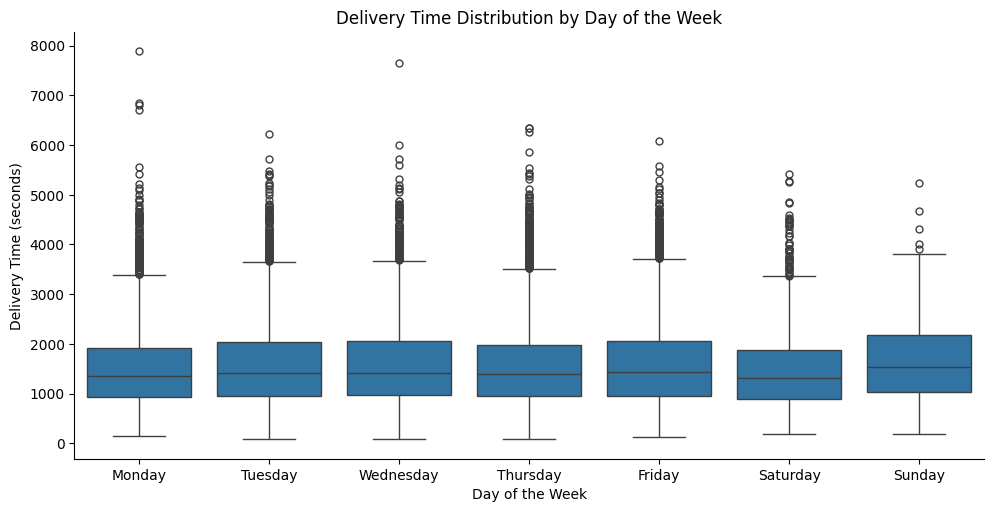

In [177]:
# Delivery time by day of the week
sns.catplot(
    x = 'Placement - Weekday (Mo = 1)', 
    y = 'Time from Pickup to Arrival', 
    data = TrainData, 
    kind = 'box', 
    height = 5, 
    aspect = 2
)

# Set the title and labels
plt.title('Delivery Time Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (seconds)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

- On Saturday, there is a slightly lower spread in delivery times compared to weekdays, which may reflect the reduced order volume allowing for more consistent delivery performance.

- Sunday shows higher variability in delivery times, with the interquartile range (IQR) appearing slightly larger and more outliers at higher delivery times. This could be due to reduced rider availability or other operational constraints on Sundays, leading to a less predictable delivery experience despite the low order volume.

- Every day has a significant number of outliers, indicating that there are consistently some deliveries that take much longer than the typical delivery time. These outliers might be influenced by factors such as traffic, road quality, or longer delivery distances.

#### Does the platform type influence the delivery time? For instance, are orders from certain platform types (like Platform Type 3) completed faster or slower than others?

In [178]:
avg_delivery_time_by_platform = TrainData.groupby('Platform Type')['Time from Pickup to Arrival'].mean()

avg_delivery_time_by_platform

Platform Type
1    1534.459649
2    1484.843612
3    1578.562729
4    1747.866667
Name: Time from Pickup to Arrival, dtype: float64

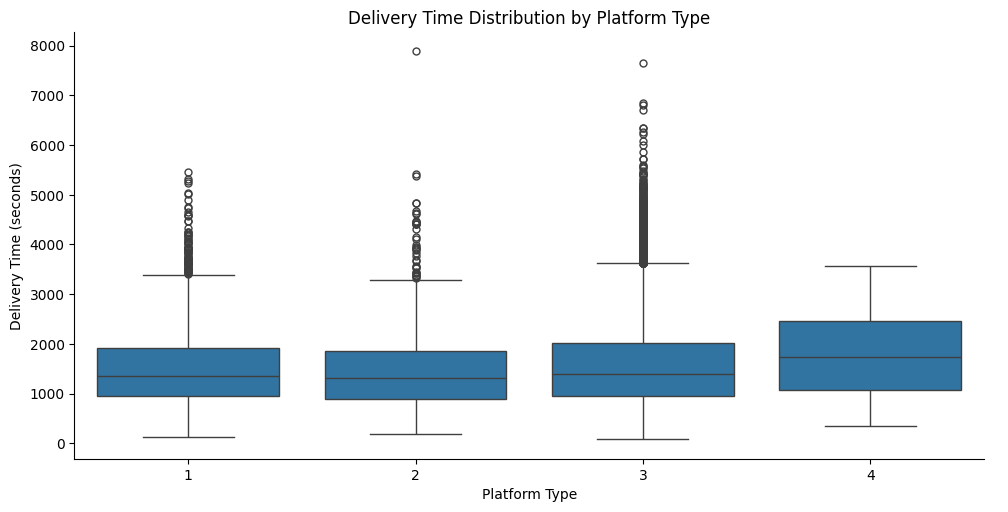

In [179]:
sns.catplot(x = 'Platform Type', y = 'Time from Pickup to Arrival', data = TrainData, kind = 'box', height = 5, aspect = 2)

plt.title('Delivery Time Distribution by Platform Type')

plt.xlabel('Platform Type')

plt.ylabel('Delivery Time (seconds)')

plt.show()

- Platform type does appear to influence delivery time. Platform Type 4 consistently has longer delivery times, while Types 1, 2, and 3 have shorter but more variable delivery times.

- Although slower, Platform Type 4 might provide a more reliable delivery experience with fewer outliers.

#### Are business orders completed faster than personal orders, or do they cover shorter distances on average?

In [180]:
avg_delivery_time_by_order_type = TrainData.groupby('Personal or Business')['Time from Pickup to Arrival'].mean()

avg_delivery_time_by_order_type

Personal or Business
Business    1576.003622
Personal    1541.197008
Name: Time from Pickup to Arrival, dtype: float64

In [181]:
avg_distance_by_order_type = TrainData.groupby('Personal or Business')['Distance (KM)'].mean()

avg_distance_by_order_type

Personal or Business
Business    10.043863
Personal     9.667513
Name: Distance (KM), dtype: float64

/tmp/ipykernel_9062/1907037087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_9062/1907037087.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


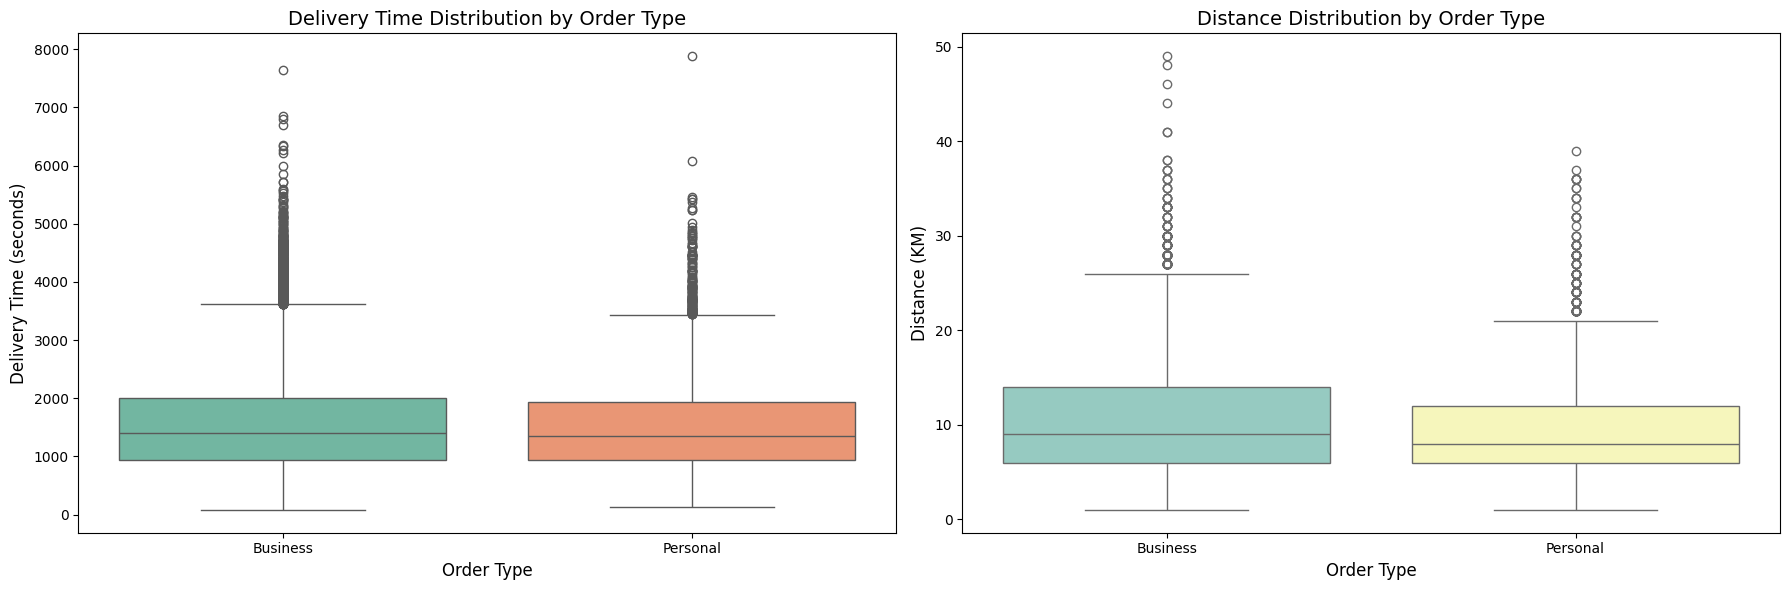

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(
    x = 'Personal or Business',
    y = 'Time from Pickup to Arrival',
    data = TrainData,
    ax = axes[0],
    palette = "Set2"
)

axes[0].set_title('Delivery Time Distribution by Order Type', fontsize = 14)
axes[0].set_xlabel('Order Type', fontsize = 12)
axes[0].set_ylabel('Delivery Time (seconds)', fontsize = 12)

sns.boxplot(
    x = 'Personal or Business',
    y = 'Distance (KM)',
    data = TrainData,
    ax = axes[1],
    palette = "Set3"
)

axes[1].set_title('Distance Distribution by Order Type', fontsize = 14)
axes[1].set_xlabel('Order Type', fontsize = 12)
axes[1].set_ylabel('Distance (KM)', fontsize = 12)

plt.tight_layout()  
plt.show()

- Business orders have a slightly shorter average delivery time (1,550.74 seconds) compared to personal orders (1,585.06 seconds). The difference is small, suggesting that while business orders may be completed marginally faster, the effect might not be substantial.

- Business orders have a slightly higher average distance (9.53 km) compared to personal orders (9.42 km). The difference is minimal, indicating that both business and personal orders tend to cover similar distances.

#### Does the time taken for deliveries vary across different days of the month, perhaps due to changes in order volume or other factors?

/tmp/ipykernel_9062/1120246952.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


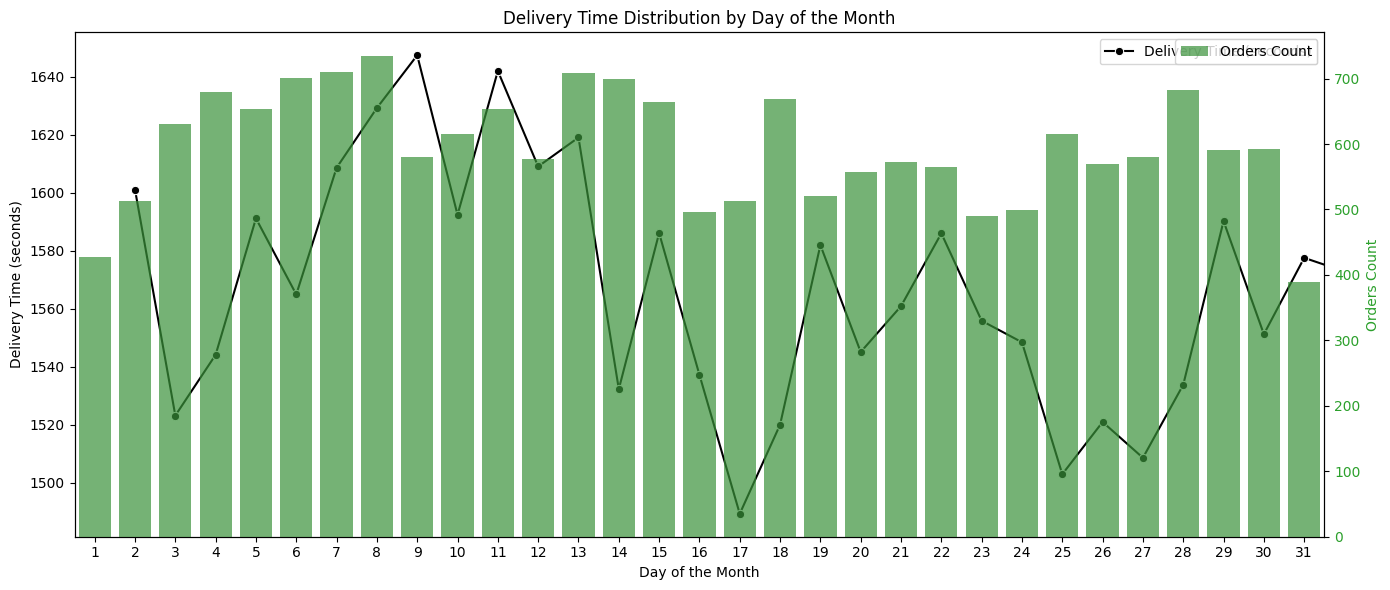

In [183]:
# Plotting the distribution of delivery time by day of the month
fig, ax1 = plt.subplots(figsize=(14, 6))

# Line plot for Delivery Time Distribution
sns.lineplot(
    x = 'Placement - Day of Month',
    y = 'Time from Pickup to Arrival',
    data = TrainData,
    ax = ax1,
    marker = 'o',
    color = 'black',
    label = 'Delivery Time (seconds)',
    ci = None
)
ax1.set_xlabel('Day of the Month')
ax1.set_ylabel('Delivery Time (seconds)')
ax1.set_title('Delivery Time Distribution by Day of the Month')
ax1.tick_params(axis = 'y', labelcolor = 'black')

ax2 = ax1.twinx()

daily_orders = TrainData['Placement - Day of Month'].value_counts().sort_index()

sns.barplot(
    x = daily_orders.index,
    y = daily_orders.values,
    ax = ax2,
    color = 'tab:green',
    alpha = 0.7,
    label = 'Orders Count'
)
ax2.set_ylabel('Orders Count', color = 'tab:green')
ax2.tick_params(axis = 'y', labelcolor = 'tab:green')

plt.tight_layout()
plt.show()

- There are certain days where delivery times seem relatively higher, such as around the 6th to the 8th day of the month, and again around the 15th and 27th to 28th day. 
- The number of orders remains fairly consistent throughout the month, with some slight variations (e.g., peaks around the 8th, 14th, 18th, and 28th day).
- The delivery time appears to be relatively stable regardless of the changes in order volume, implying that other factors like rider availability, road quality, weather conditions, or other operational efficiencies may play a significant role in maintaining consistent delivery times.

#### Are there congestion zones in Nairobi that lead to longer delivery times, and how do they interact with road types?

In [184]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import HeatMap

# Extract coordinates
pickup_coords = TrainData[['Pickup Lat', 'Pickup Long']].copy()
dropoff_coords = TrainData[['Destination Lat', 'Destination Long']].copy()

# Function to identify geographical clusters
def identify_geo_clusters(coords_df, n_clusters=5):
    # Remove rows with missing coordinates
    coords_df = coords_df.dropna()
    
    # Standardize the coordinates
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords_df)
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(coords_scaled)
    
    # Add cluster labels to the original data
    coords_df['Cluster'] = kmeans.labels_
    
    # Calculate cluster centers
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    cluster_center_df = pd.DataFrame(cluster_centers, columns=coords_df.columns[:-1])
    cluster_center_df['Cluster'] = range(n_clusters)
    
    return coords_df, cluster_center_df

# Identify clusters for pickup and dropoff locations
pickup_clusters, pickup_centers = identify_geo_clusters(pickup_coords, n_clusters=5)
dropoff_clusters, dropoff_centers = identify_geo_clusters(dropoff_coords, n_clusters=5)

# Add cluster labels to original data
TrainData['Pickup_Cluster'] = pickup_clusters['Cluster']
TrainData['Dropoff_Cluster'] = dropoff_clusters['Cluster']

In [185]:
# Calculate average delivery times for each pickup-dropoff cluster combination
cluster_stats = TrainData.groupby(['Pickup_Cluster', 'Dropoff_Cluster'])['Time from Pickup to Arrival'].agg(
    ['mean', 'median', 'std', 'count']).reset_index()

# Identify potential congestion zones based on higher delivery times
congestion_threshold = TrainData['Time from Pickup to Arrival'].quantile(0.75)
congestion_zones = cluster_stats[cluster_stats['median'] > congestion_threshold]

print("Potential congestion zones (cluster combinations with higher delivery times):")
print(congestion_zones.sort_values('median', ascending=False).head(10))

Potential congestion zones (cluster combinations with higher delivery times):
    Pickup_Cluster  Dropoff_Cluster         mean  median          std  count
10               2                0  2840.866667  2652.5  1009.982194    120
17               3                2  2873.559633  2636.0   962.689581    109
20               4                0  2607.717172  2513.0   989.202163     99
13               2                3  2477.577320  2356.0   856.340658    194
24               4                4  2503.758350  2350.0   874.648417    509
22               4                2  2409.168831  2327.0   857.985148    231
8                1                3  2491.301683  2286.0   935.097334    832


In [186]:
# Geographical distribution of clusters and delivery times
# Create a map centered at Nairobi
nairobi_coords = [TrainData['Pickup Lat'].mean(), TrainData['Pickup Long'].mean()]
map_clusters = folium.Map(location=nairobi_coords, zoom_start=12)

# Define color map for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'cadetblue', 'darkgreen', 'darkpurple', 'pink']

# Add pickup clusters to the map
for cluster in range(len(pickup_centers)):
    folium.CircleMarker(
        location=[pickup_centers.iloc[cluster, 0], pickup_centers.iloc[cluster, 1]],
        radius=10,
        popup=f'Pickup Cluster {cluster}',
        color=colors[cluster % len(colors)],
        fill=True,
        fill_color=colors[cluster % len(colors)]
    ).add_to(map_clusters)

# Add dropoff clusters to the map with different markers
for cluster in range(len(dropoff_centers)):
    folium.CircleMarker(
        location=[dropoff_centers.iloc[cluster, 0], dropoff_centers.iloc[cluster, 1]],
        radius=10,
        popup=f'Dropoff Cluster {cluster}',
        color=colors[cluster % len(colors)],
        fill=False,
        fill_color=colors[cluster % len(colors)]
    ).add_to(map_clusters)
    
from IPython.display import display
display(map_clusters)

In [187]:
# Heatmap of delivery times

delivery_times = TrainData[['Pickup Lat', 'Pickup Long', 'Time from Pickup to Arrival']].dropna()

# Normalize delivery times for better visualization
delivery_times['Time_Normalized'] = delivery_times['Time from Pickup to Arrival'] / delivery_times['Time from Pickup to Arrival'].max()

# Create a list of [lat, lon, intensity] for heatmap
heatmap_data = [[row['Pickup Lat'], row['Pickup Long'], row['Time_Normalized']] 
                for _, row in delivery_times.iterrows()]

# Create a map for the heatmap
map_heatmap = folium.Map(location=nairobi_coords, zoom_start=12)

# Add the heatmap
HeatMap(heatmap_data, radius=15).add_to(map_heatmap)

display(map_heatmap)

#### Is there a significant difference between the shortest path distance and the actual distance covered? If so, does this affect the delivery time?

In [188]:
# First, let's check if both distance columns exist
if 'Distance (KM)' in TrainData.columns and 'Shortest Path Distance' in TrainData.columns:
    # Convert Shortest Path Distance to kilometers (assuming it's in meters)
    if TrainData['Shortest Path Distance'].mean() > 1000:  # Simple check to see if it's likely in meters
        TrainData['Shortest Path Distance (KM)'] = TrainData['Shortest Path Distance'] / 1000
    else:
        TrainData['Shortest Path Distance (KM)'] = TrainData['Shortest Path Distance']
    
    # Calculate the difference and ratio between actual distance and shortest path
    TrainData['Distance_Difference'] = TrainData['Distance (KM)'] - TrainData['Shortest Path Distance (KM)']
    TrainData['Distance_Ratio'] = TrainData['Distance (KM)'] / TrainData['Shortest Path Distance (KM)']
    
    # Remove potential outliers and invalid values
    TrainData = TrainData[
        (TrainData['Distance (KM)'] > 0) & 
        (TrainData['Shortest Path Distance (KM)'] > 0) &
        (TrainData['Distance_Ratio'] < 5)  # Remove extreme outliers where actual is 5+ times the shortest
    ]
    
    print("Basic statistics of distance measures:")
    print(f"Mean actual distance: {TrainData['Distance (KM)'].mean():.2f} km")
    print(f"Mean shortest path distance: {TrainData['Shortest Path Distance (KM)'].mean():.2f} km")
    print(f"Mean difference: {TrainData['Distance_Difference'].mean():.2f} km")
    print(f"Mean ratio (actual/shortest): {TrainData['Distance_Ratio'].mean():.2f}")

Basic statistics of distance measures:
Mean actual distance: 9.70 km
Mean shortest path distance: 9.44 km
Mean difference: 0.26 km
Mean ratio (actual/shortest): 1.15


In [189]:
# Perform a paired t-test to see if the difference is statistically significant
t_stat, p_value = stats.ttest_rel(
    TrainData['Distance (KM)'], 
        TrainData['Shortest Path Distance (KM)']
    )
print(f"\nPaired t-test results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Significant difference: {p_value < 0.05}")


Paired t-test results:
T-statistic: 6.6963
P-value: 2.2010e-11
Significant difference: True


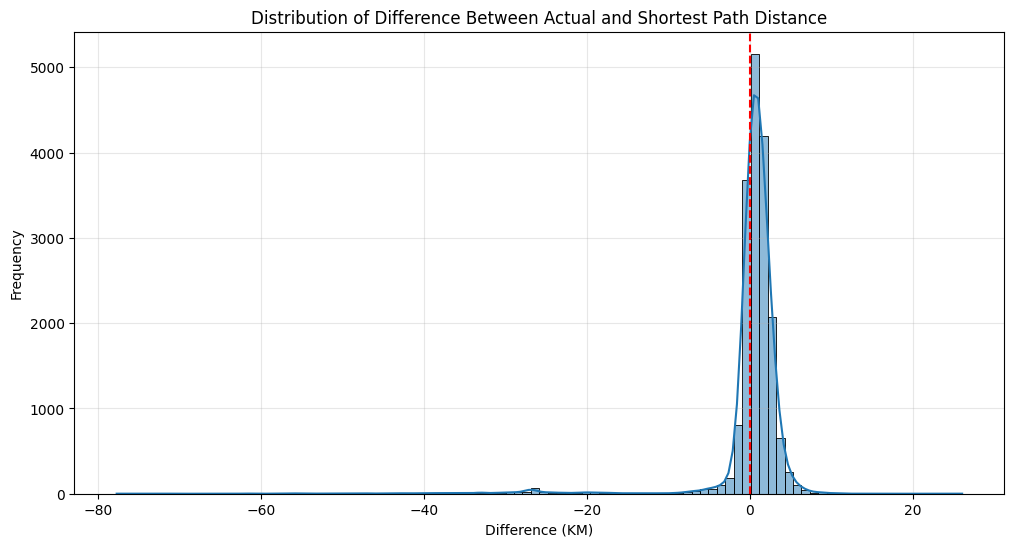

In [190]:
plt.figure(figsize=(12, 6))

sns.histplot(data=TrainData['Distance_Difference'], kde = True, bins = 100)

plt.title('Distribution of Difference Between Actual and Shortest Path Distance')
plt.xlabel('Difference (KM)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()

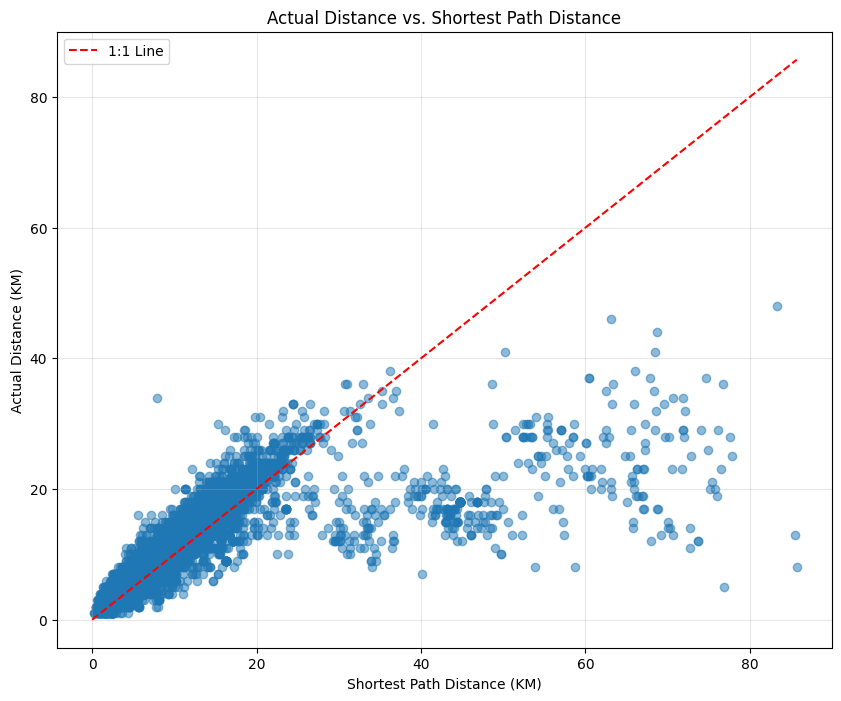

In [191]:
# Visualize the relationship between distances
plt.figure(figsize=(10, 8))
plt.scatter(
    TrainData['Shortest Path Distance (KM)'], 
        TrainData['Distance (KM)'],
        alpha=0.5
    )
plt.plot([0, TrainData['Shortest Path Distance (KM)'].max()], 
             [0, TrainData['Shortest Path Distance (KM)'].max()], 
             'r--', label='1:1 Line')
plt.title('Actual Distance vs. Shortest Path Distance')
plt.xlabel('Shortest Path Distance (KM)')
plt.ylabel('Actual Distance (KM)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

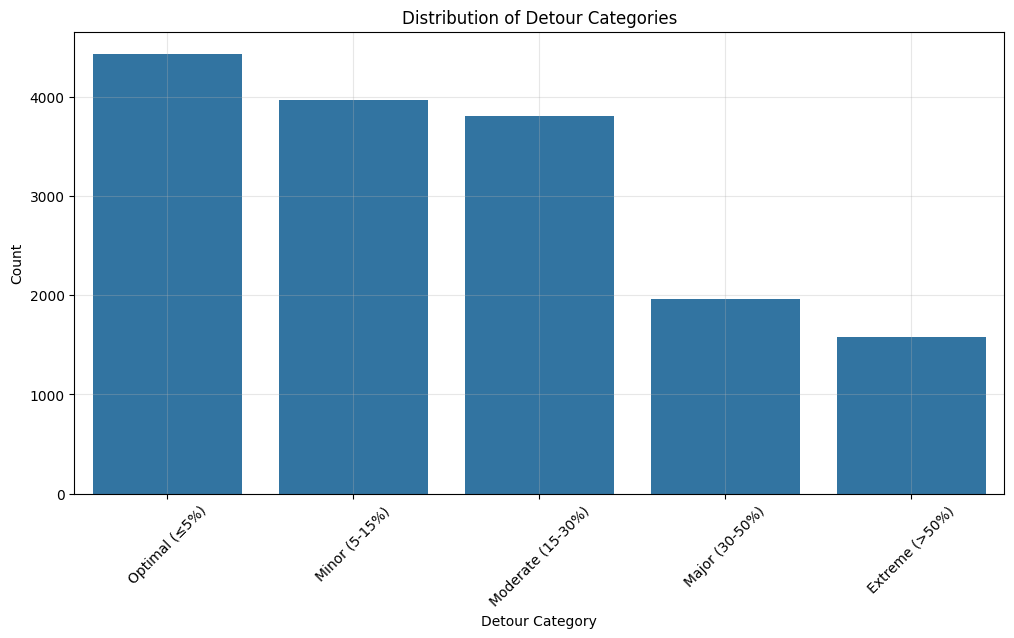

In [192]:
# Calculate a detour factor
TrainData['Detour_Factor'] = TrainData['Distance_Ratio'] - 1
    
# Create detour factor categories
bins = [-0.1, 0.05, 0.15, 0.30, 0.50, np.inf]
labels = ['Optimal (≤5%)', 'Minor (5-15%)', 'Moderate (15-30%)', 'Major (30-50%)', 'Extreme (>50%)']
TrainData['Detour_Category'] = pd.cut(TrainData['Detour_Factor'], bins=bins, labels=labels)
    
# Visualize the distribution of detour categories
plt.figure(figsize=(12, 6))
sns.countplot(data=TrainData, x='Detour_Category', order=labels)
plt.title('Distribution of Detour Categories')
plt.xlabel('Detour Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [193]:
# Calculate delivery time statistics by detour category
detour_stats = TrainData.groupby('Detour_Category')['Time from Pickup to Arrival'].agg(
        ['mean', 'median', 'std', 'count']).reset_index()
print("\nDelivery time by detour category:")
print(detour_stats)


Delivery time by detour category:
     Detour_Category         mean  median         std  count
0      Optimal (≤5%)  1575.335664  1416.0  807.686090   4433
1      Minor (5-15%)  1739.816692  1567.0  858.170796   3966
2  Moderate (15-30%)  1672.995795  1506.0  833.801265   3805
3     Major (30-50%)  1453.040306  1266.0  801.612757   1960
4     Extreme (>50%)   996.548796   829.5  631.968033   1578


/tmp/ipykernel_9062/1031553507.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detour_stats = TrainData.groupby('Detour_Category')['Time from Pickup to Arrival'].agg(


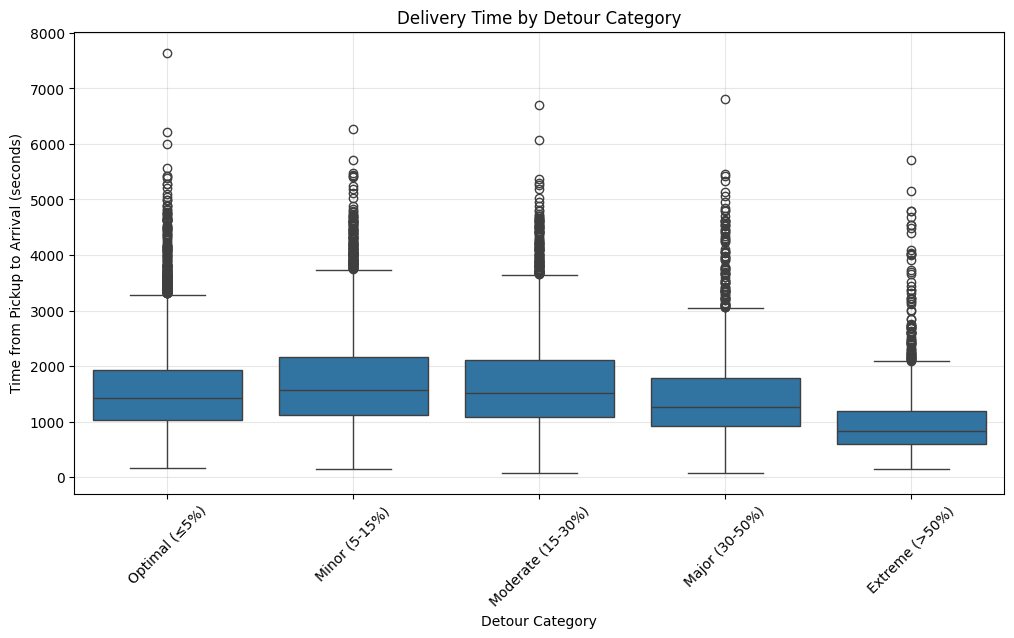

In [194]:
# Visualize delivery time by detour category
plt.figure(figsize=(12, 6))
sns.boxplot(data=TrainData, x='Detour_Category', y='Time from Pickup to Arrival', order=labels)
plt.title('Delivery Time by Detour Category')
plt.xlabel('Detour Category')
plt.ylabel('Time from Pickup to Arrival (seconds)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


Average speed by detour category:
     Detour_Category       mean     median       std  count
0      Optimal (≤5%)  23.348784  22.447389  8.390420   4433
1      Minor (5-15%)  24.305283  23.529412  8.205467   3966
2  Moderate (15-30%)  24.078060  23.617619  8.046111   3805
3     Major (30-50%)  24.250999  23.661993  8.489621   1960
4     Extreme (>50%)  23.742396  22.605965  8.550101   1578


/tmp/ipykernel_9062/2555591875.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  speed_stats = TrainData.groupby('Detour_Category')['Average_Speed_KMH'].agg(


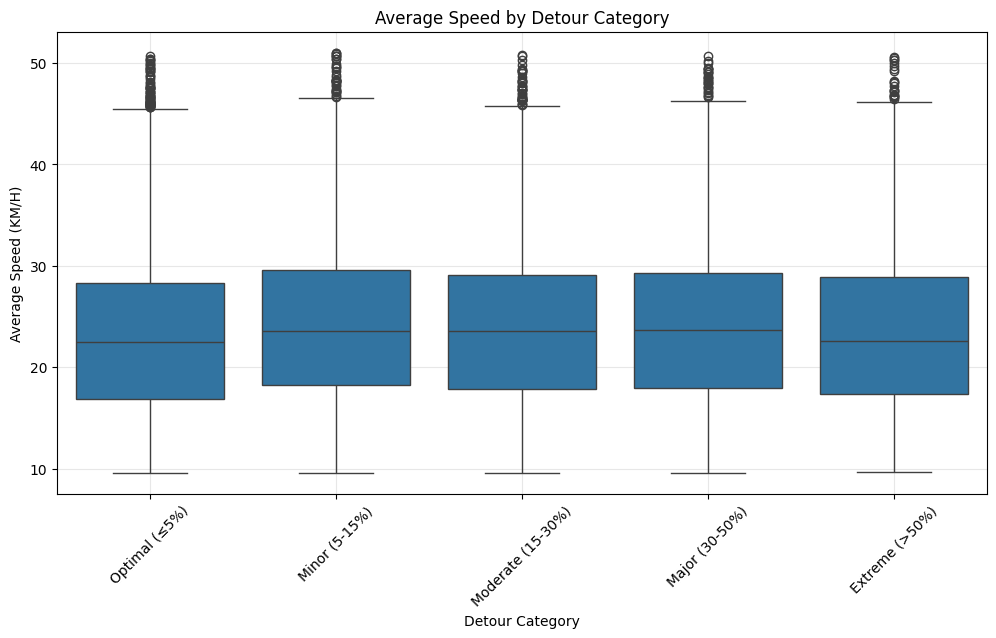

In [195]:
# Calculate average speed by detour category
TrainData['Average_Speed_KMH'] = (TrainData['Distance (KM)'] / 
                                TrainData['Time from Pickup to Arrival']) * 3600

# Filter out unrealistic speeds
TrainData = TrainData[TrainData['Average_Speed_KMH'] <= 60]

# Calculate speed statistics by detour category
speed_stats = TrainData.groupby('Detour_Category')['Average_Speed_KMH'].agg(
    ['mean', 'median', 'std', 'count']).reset_index()
print("\nAverage speed by detour category:")
print(speed_stats)

# Visualize average speed by detour category
plt.figure(figsize=(12, 6))
sns.boxplot(data=TrainData, x='Detour_Category', y='Average_Speed_KMH', order=labels)
plt.title('Average Speed by Detour Category')
plt.xlabel('Detour Category')
plt.ylabel('Average Speed (KM/H)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


Detour factor by road quality:
  Road Quality      mean    median       std  count
0        paved  0.152201  0.108659  0.322888  14956
1      unknown  0.195023  0.138808  0.382735    916
2      unpaved  0.114213  0.086620  0.328705   1996


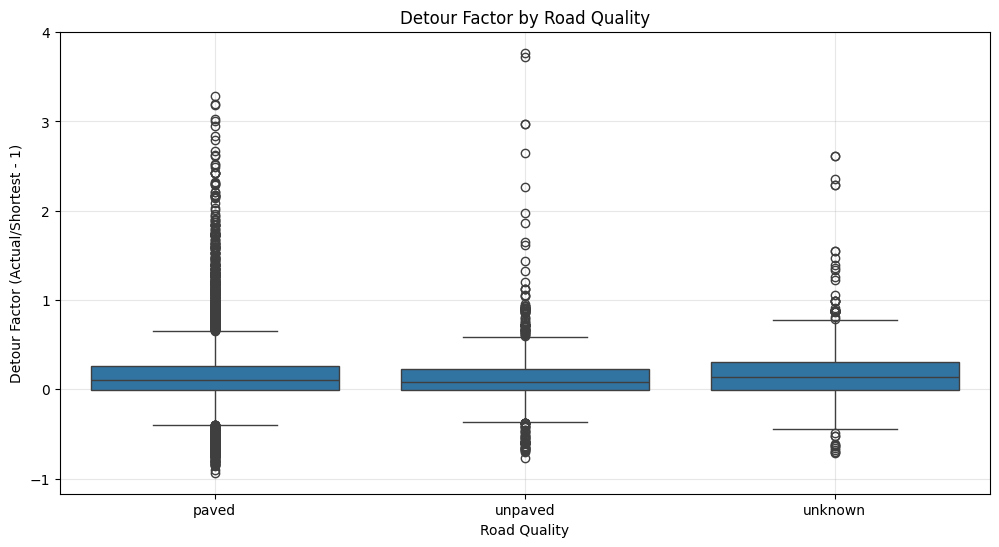

In [196]:
# Investigate if road quality affects detour factor
if 'Road Quality' in TrainData.columns:
    # Calculate average detour factor by road quality
    road_detour_stats = TrainData.groupby('Road Quality')['Detour_Factor'].agg(
        ['mean', 'median', 'std', 'count']).reset_index()
    print("\nDetour factor by road quality:")
    print(road_detour_stats)
    
    # Visualize detour factor by road quality
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=TrainData, x='Road Quality', y='Detour_Factor')
    plt.title('Detour Factor by Road Quality')
    plt.xlabel('Road Quality')
    plt.ylabel('Detour Factor (Actual/Shortest - 1)')
    plt.grid(True, alpha=0.3)
    plt.show()

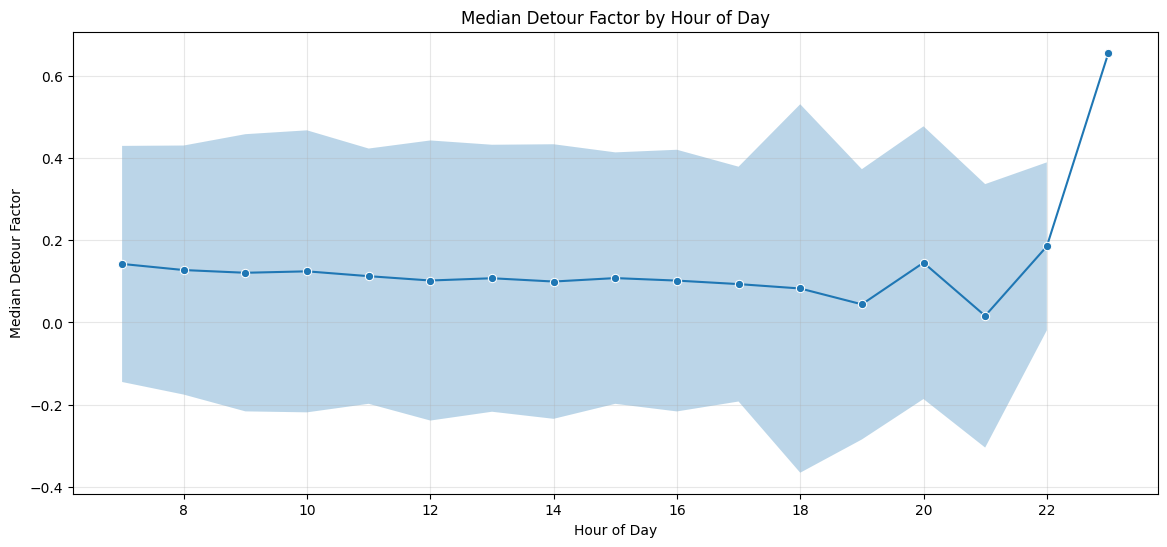

In [197]:
# Investigate how detour factor varies by time of day
if 'Pickup - Time Hour' in TrainData.columns:
    time_col = 'Pickup - Time Hour'
elif 'Pickup - Time' in TrainData.columns:
    # Extract hour from timestamp
    TrainData['Hour'] = pd.to_datetime(TrainData['Pickup - Time']).dt.hour
    time_col = 'Hour'

if 'time_col' in locals():
    # Calculate average detour factor by hour
    hour_detour_stats = TrainData.groupby(time_col)['Detour_Factor'].agg(
        ['mean', 'median', 'std', 'count']).reset_index()
    
    # Visualize detour factor by hour
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=hour_detour_stats, x=time_col, y='median', marker='o')
    plt.fill_between(
        hour_detour_stats[time_col],
        hour_detour_stats['median'] - hour_detour_stats['std'],
        hour_detour_stats['median'] + hour_detour_stats['std'],
        alpha=0.3
    )
    plt.title('Median Detour Factor by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Median Detour Factor')
    plt.grid(True, alpha=0.3)
    plt.show()

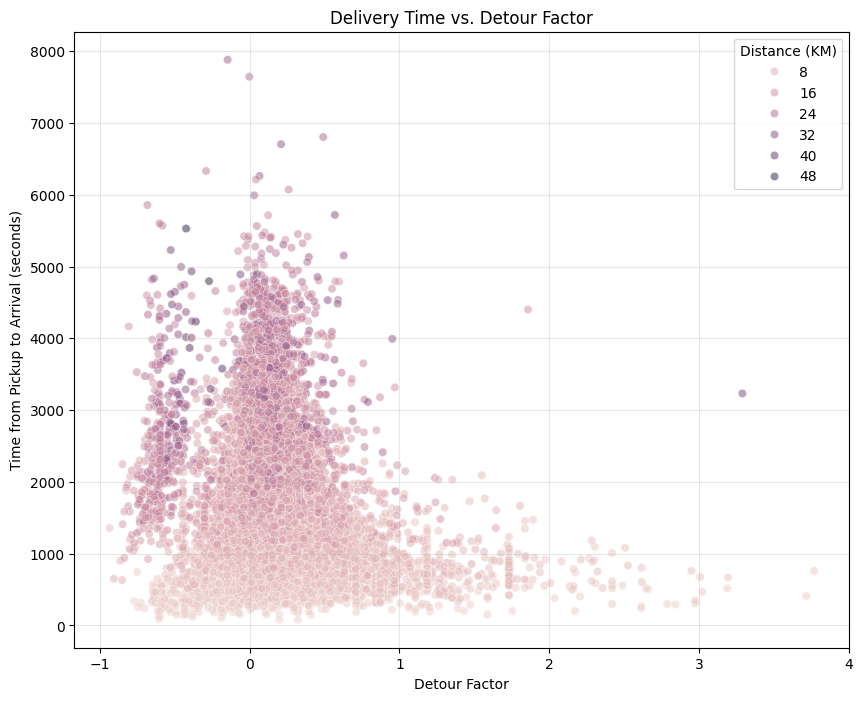

In [198]:
# Examine the relationship between detour factor and delivery time
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=TrainData, 
    x='Detour_Factor', 
    y='Time from Pickup to Arrival',
    hue='Distance (KM)',
    alpha=0.5
)
plt.title('Delivery Time vs. Detour Factor')
plt.xlabel('Detour Factor')
plt.ylabel('Time from Pickup to Arrival (seconds)')
plt.grid(True, alpha=0.3)
plt.show()

In [199]:
# Run a regression to quantify the impact of detour factor on delivery time
# Control for distance to isolate the effect of detours
import statsmodels.api as sm
from statsmodels.formula.api import ols

X = TrainData[['Distance (KM)', 'Detour_Factor']]
X = sm.add_constant(X)  # Add intercept term
y = TrainData['Time from Pickup to Arrival']

model = sm.OLS(y, X).fit()
print("\nRegression results (effect of detour factor on delivery time, controlling for distance):")
print(model.summary().tables[1])


Regression results (effect of detour factor on delivery time, controlling for distance):
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           432.0982      9.463     45.664      0.000     413.551     450.646
Distance (KM)   115.9302      0.810    143.140      0.000     114.343     117.518
Detour_Factor   -74.9945     13.341     -5.621      0.000    -101.145     -48.844


In [200]:
# Calculate potential time savings if all routes were optimal
avg_detour = TrainData['Detour_Factor'].mean()
avg_time = TrainData['Time from Pickup to Arrival'].mean()
detour_coefficient = model.params['Detour_Factor']

potential_time_savings = avg_detour * detour_coefficient
potential_time_savings_percent = (potential_time_savings / avg_time) * 100

print(f"\nPotential impact of optimizing routes:")
print(f"Average detour factor: {avg_detour:.2f}")
print(f"Effect of detour on delivery time: {detour_coefficient:.2f} seconds per unit of detour factor")
print(f"Potential time savings if all routes were optimal: {potential_time_savings:.2f} seconds ({potential_time_savings_percent:.2f}%)")


Potential impact of optimizing routes:
Average detour factor: 0.15
Effect of detour on delivery time: -74.99 seconds per unit of detour factor
Potential time savings if all routes were optimal: -11.26 seconds (-0.73%)


- The Detour Paradox: Longer routes are associated with shorter delivery times, suggesting riders may choose longer routes specifically because they allow faster travel (e.g., avoiding congestion, utilizing better roads).
- Minimal Optimization Potential: The negative coefficient in the regression model indicates that forcing riders to take the shortest path might actually increase delivery times.
- Road Quality Matters: The different detour factors across road qualities suggest that routing decisions are influenced by road conditions rather than just distance.
- Time of Day Considerations: The spike in detour factor late at night warrants further investigation - possibly due to safety concerns, road closures, or smaller sample sizes.
- Rider Decision-Making: Riders appear to make rational trade-offs between distance and speed, often choosing slightly longer routes that allow faster overall delivery.

These findings challenge the assumption that shortest path routing would improve delivery efficiency. Instead, they suggest that local knowledge and rider autonomy in route selection may already be optimizing for actual delivery time rather than distance.

In [201]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17868 entries, 0 to 19946
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Order No                                   17868 non-null  object  
 1   User Id                                    17868 non-null  object  
 2   Vehicle Type                               17868 non-null  object  
 3   Platform Type                              17868 non-null  int64   
 4   Personal or Business                       17868 non-null  object  
 5   Placement - Day of Month                   17868 non-null  int64   
 6   Placement - Weekday (Mo = 1)               17868 non-null  int64   
 7   Placement - Time                           17868 non-null  object  
 8   Confirmation - Day of Month                17868 non-null  int64   
 9   Confirmation - Weekday (Mo = 1)            17868 non-null  int64   
 10  Confirmation - 

In [202]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

### Feature Engineering

In [207]:
import logging

sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Suppress LightGBM warnings
logging.getLogger('lightgbm').setLevel(logging.ERROR)

In [208]:
# Helper functions used across the notebook

def categorize_time(hour):
    """Categorize hour of day into time periods"""
    if 6 <= hour < 10:
        return 'Morning Rush (6-10)'
    elif 10 <= hour < 15:
        return 'Midday (10-15)'
    elif 15 <= hour < 19:
        return 'Evening Rush (15-19)'
    else:
        return 'Night/Early Morning'

def clean_data_for_modeling(X):
    """Handle infinity, NaN and extreme values in the dataset"""
    print("Cleaning data for modeling...")
    
    # Make a copy to avoid modifying original
    X_clean = X.copy()
    
    # Replace inf values with NaN
    X_clean = X_clean.replace([np.inf, -np.inf], np.nan)
    
    # Check for and handle extreme values
    float32_max = np.finfo(np.float32).max / 1e3  # Safety margin
    for col in X_clean.select_dtypes(include=['float64', 'float32']).columns:
        # Check if column has extreme values
        if X_clean[col].max() > float32_max or X_clean[col].min() < -float32_max:
            X_clean[col] = X_clean[col].clip(-float32_max, float32_max)
    
    # Fill any resulting NaN values with median
    for col in X_clean.columns:
        if X_clean[col].isnull().sum() > 0:
            fill_value = X_clean[col].median()
            if pd.isna(fill_value):  # If median is NaN, use 0
                fill_value = 0
            X_clean[col] = X_clean[col].fillna(fill_value)
    
    return X_clean

In [209]:
def engineer_time_features(df):
    """Engineer time-related features"""
    print("Engineering time features...")
    
    # Time of day categories
    if 'Pickup - Time Hour' in df.columns:
        df['Time_Category'] = df['Pickup - Time Hour'].apply(categorize_time)
    elif 'Pickup_Hour' not in df.columns and 'Pickup - Time' in df.columns:
        # Extract hour from pickup time if needed
        try:
            df['Pickup_Hour'] = pd.to_datetime(df['Pickup - Time']).dt.hour
            df['Time_Category'] = df['Pickup_Hour'].apply(categorize_time)
        except:
            print("Could not process Pickup - Time")
    
    # Rush hour flag
    if 'Pickup - Time Hour' in df.columns:
        df['Rush_Hour'] = df['Pickup - Time Hour'].apply(
            lambda x: 1 if (6 <= x < 10) or (15 <= x < 19) else 0
        )
    elif 'Pickup_Hour' in df.columns:
        df['Rush_Hour'] = df['Pickup_Hour'].apply(
            lambda x: 1 if (6 <= x < 10) or (15 <= x < 19) else 0
        )
    
    # Is weekend
    df['Is_Weekend'] = df['Placement - Weekday (Mo = 1)'].apply(
        lambda x: 1 if x >= 6 else 0
    )
    
    # Circular encoding of hours (for time cyclicality)
    for col in [c for c in df.columns if 'Hour' in c and df[c].dtype != 'object']:
        df[f"{col}_sin"] = np.sin(2 * np.pi * df[col]/24)
        df[f"{col}_cos"] = np.cos(2 * np.pi * df[col]/24)
    
    # Time differences between processing steps
    if all(col in df.columns for col in ['Placement - Time Hour', 'Confirmation - Time Hour']):
        df['Time_to_Confirm'] = (df['Confirmation - Time Hour'] - df['Placement - Time Hour']) % 24
    
    if all(col in df.columns for col in ['Confirmation - Time Hour', 'Arrival at Pickup - Time Hour']):
        df['Time_to_Arrive'] = (df['Arrival at Pickup - Time Hour'] - df['Confirmation - Time Hour']) % 24
    
    # More detailed day period
    df['Day_Period'] = pd.cut(
        df['Pickup - Time Hour'],
        bins=[0, 5, 12, 17, 21, 24],
        labels=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Early Night'],
        include_lowest=True
    )
    
    return df

In [210]:
# Distance

def engineer_distance_features(df):
    """Engineer distance-related features"""
    print("Engineering distance features...")
    
    # Convert Shortest Path Distance to KM if needed
    if 'Shortest Path Distance' in df.columns and 'Shortest Path Distance (KM)' not in df.columns:
        # Check if it's likely in meters
        if df['Shortest Path Distance'].mean() > 1000:
            df['Shortest Path Distance (KM)'] = df['Shortest Path Distance'] / 1000
        else:
            df['Shortest Path Distance (KM)'] = df['Shortest Path Distance']
    
    # Handle missing Shortest Path Distance
    if 'Shortest Path Distance (KM)' in df.columns and df['Shortest Path Distance (KM)'].isnull().sum() > 0:
        print(f"Filling {df['Shortest Path Distance (KM)'].isnull().sum()} missing shortest path distances...")
        # Use the actual distance as fallback
        df['Shortest Path Distance (KM)'].fillna(df['Distance (KM)'], inplace=True)
    
    # Distance ratio and detour factor
    if 'Shortest Path Distance (KM)' in df.columns:
        # Avoid division by zero
        df['Distance_Ratio'] = df['Distance (KM)'] / df['Shortest Path Distance (KM)'].replace(0, 0.001)
        df['Detour_Factor'] = df['Distance_Ratio'] - 1
    
    # Distance categories
    df['Distance_Category'] = pd.cut(
        df['Distance (KM)'], 
        bins=[0, 3, 7, 12, 20, float('inf')],
        labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
    )
    
    # Straight-line distance (haversine)
    R = 6371  # Earth radius in kilometers
    
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [
        df['Pickup Lat'], df['Pickup Long'], 
        df['Destination Lat'], df['Destination Long']
    ])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    df['Straight_Line_KM'] = R * c
    
    # Route directness
    df['Route_Directness'] = df['Straight_Line_KM'] / df['Distance (KM)'].replace(0, 0.001)
    
    # Add distance deviation percentage
    df['Distance_Deviation_Pct'] = (df['Distance (KM)'] - df['Straight_Line_KM']) / df['Straight_Line_KM'].replace(0, 0.001) * 100
    
    # Distance difference from mean for this road type
    if 'Pickup Road Type' in df.columns:
        for road_type in df['Pickup Road Type'].unique():
            mask = df['Pickup Road Type'] == road_type
            if mask.sum() > 0:
                mean_dist = df.loc[mask, 'Distance (KM)'].mean()
                df.loc[mask, 'Distance_From_RoadType_Mean'] = df.loc[mask, 'Distance (KM)'] - mean_dist
    
    return df

In [211]:
def engineer_weather_features(df):
    """Engineer weather-related features"""
    print("Engineering weather features...")
    
    # Fill missing precipitation
    if 'Precipitation in millimeters' in df.columns:
        df['Precipitation in millimeters'] = df['Precipitation in millimeters'].fillna(0)
    
    # Temperature categories
    if 'Temperature' in df.columns and 'Temperature_Category' not in df.columns:
        temp_min = df['Temperature'].min()
        temp_max = df['Temperature'].max()
        df['Temperature_Category'] = pd.cut(
            df['Temperature'],
            bins=[temp_min-0.1, 20, 25, temp_max+0.1],
            labels=['Cool', 'Moderate', 'Hot']
        )
    
    # Rain categories
    if 'Precipitation in millimeters' in df.columns:
        df['Rain_Category'] = pd.cut(
            df['Precipitation in millimeters'],
            bins=[-0.001, 0, 1, 5, float('inf')],
            labels=['None', 'Light', 'Moderate', 'Heavy']
        )
    
    # Interaction between rain and road quality
    if 'RainToday' in df.columns and 'Road Quality' in df.columns:
        df['Rain_Road_Interaction'] = df['RainToday'] + "_" + df['Road Quality']
    
    # Temperature deviation from mean
    if 'Temperature' in df.columns:
        df['Temp_Deviation'] = df['Temperature'] - df['Temperature'].mean()
    
    # Rain intensity
    if 'Precipitation in millimeters' in df.columns:
        df['Rain_Intensity'] = np.log1p(df['Precipitation in millimeters'])
    
    return df

def engineer_rider_features(df, riders_df):
    """Engineer rider-related features"""
    print("Engineering rider features...")
    
    # Merge rider data if needed
    if 'No_Of_Orders' not in df.columns:
        df = pd.merge(df, riders_df, on='Rider Id', how='left')
    
    # Experience buckets
    if 'No_Of_Orders' in df.columns:
        df['Experience_Bucket'] = df['No_Of_Orders'].apply(
            lambda x: 'Beginner' if x <= 50 else
                    'Intermediate' if x <= 100 else
                    'Experienced' if x <= 200 else 'Expert'
        )
    
    # Rating quantiles
    if 'Average_Rating' in df.columns:
        try:
            df['Rating_Quantile'] = pd.qcut(
                df['Average_Rating'],
                q=4,
                labels=['Low', 'Medium-Low', 'Medium-High', 'High']
            )
        except:
            # Handle case where distribution doesn't allow for 4 quantiles
            print("Could not create rating quantiles - using categories instead")
            df['Rating_Quantile'] = pd.cut(
                df['Average_Rating'],
                bins=[0, 3.5, 4.0, 4.5, 5.0],
                labels=['Low', 'Medium-Low', 'Medium-High', 'High']
            )
    
    # Normalize experience
    if 'No_Of_Orders' in df.columns:
        df['Experience_Normalized'] = df['No_Of_Orders'] / df['No_Of_Orders'].max()
    
    # Experience-to-ratings ratio
    if all(col in df.columns for col in ['No_Of_Orders', 'Average_Rating']):
        df['Experience_Rating_Ratio'] = df['No_Of_Orders'] / (df['Average_Rating'] ** 2)
    
    # Expertise level
    if all(col in df.columns for col in ['No_Of_Orders', 'Age']):
        df['Rider_Expertise'] = df['No_Of_Orders'] * np.log1p(df['Age'])
    
    return df

def engineer_interaction_features(df):
    """Create interaction features"""
    print("Engineering interaction features...")
    
    # Pickup time and day interaction
    if 'Time_Category' in df.columns and 'Placement - Weekday (Mo = 1)' in df.columns:
        df['Time_Day_Interaction'] = df['Time_Category'] + "_Day" + df['Placement - Weekday (Mo = 1)'].astype(str)
    
    # Rush hour and distance category
    if 'Rush_Hour' in df.columns and 'Distance_Category' in df.columns:
        df['Rush_Distance'] = df['Rush_Hour'].astype(str) + "_" + df['Distance_Category'].astype(str)
    
    # Time and road quality
    if 'Time_Category' in df.columns and 'Road Quality' in df.columns:
        df['Time_Road_Quality'] = df['Time_Category'] + "_" + df['Road Quality']
    
    # Numerical interactions
    if 'Detour_Factor' in df.columns and 'Distance (KM)' in df.columns:
        df['Distance_Detour'] = df['Distance (KM)'] * df['Detour_Factor']
    
    if 'Rush_Hour' in df.columns and 'Distance (KM)' in df.columns:
        df['Rush_Dist'] = df['Rush_Hour'] * df['Distance (KM)']
    
    # Experience and road quality interaction
    if 'Experience_Bucket' in df.columns and 'Road Quality' in df.columns:
        df['Experience_Road'] = df['Experience_Bucket'] + "_" + df['Road Quality']
    
    # Weather and distance interaction
    if 'Temperature' in df.columns and 'Distance (KM)' in df.columns:
        df['Temp_Distance'] = df['Temperature'] * df['Distance (KM)']
    
    # Cluster-specific rush hour effect
    if 'Pickup_Cluster' in df.columns and 'Rush_Hour' in df.columns:
        df['Cluster_Rush'] = df['Pickup_Cluster'].astype(str) + "_Rush" + df['Rush_Hour'].astype(str)
    
    return df

In [212]:
def engineer_geospatial_features(train_df, test_df):
    """Engineer geospatial features and apply consistent clustering"""
    print("Engineering geospatial features...")
    
    # Check if clusters are already present
    if 'Pickup_Cluster' in train_df.columns and 'Pickup_Cluster' in test_df.columns:
        print("Clusters already exist, skipping clustering...")
        
        # Create cluster combinations if they don't exist
        if 'Cluster_Pair' not in train_df.columns:
            train_df['Cluster_Pair'] = train_df['Pickup_Cluster'].astype(str) + "_" + train_df['Dropoff_Cluster'].astype(str)
        
        if 'Cluster_Pair' not in test_df.columns:
            test_df['Cluster_Pair'] = test_df['Pickup_Cluster'].astype(str) + "_" + test_df['Dropoff_Cluster'].astype(str)
        
        return train_df, test_df
    
    # Combine datasets for consistent clustering
    combined_pickup = pd.concat([
        train_df[['Pickup Lat', 'Pickup Long']],
        test_df[['Pickup Lat', 'Pickup Long']]
    ])
    
    combined_dropoff = pd.concat([
        train_df[['Destination Lat', 'Destination Long']],
        test_df[['Destination Lat', 'Destination Long']]
    ])
    
    # Use more clusters for better geographic resolution
    n_clusters = 7
    
    # Cluster pickup locations
    kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=42)
    scaler_pickup = StandardScaler()
    pickup_scaled = scaler_pickup.fit_transform(combined_pickup)
    kmeans_pickup.fit(pickup_scaled)
    
    # Cluster dropoff locations
    kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=42)
    scaler_dropoff = StandardScaler()
    dropoff_scaled = scaler_dropoff.fit_transform(combined_dropoff)
    kmeans_dropoff.fit(dropoff_scaled)
    
    # Assign clusters to train
    train_pickup_scaled = scaler_pickup.transform(train_df[['Pickup Lat', 'Pickup Long']])
    train_df['Pickup_Cluster'] = kmeans_pickup.predict(train_pickup_scaled)
    
    train_dropoff_scaled = scaler_dropoff.transform(train_df[['Destination Lat', 'Destination Long']])
    train_df['Dropoff_Cluster'] = kmeans_dropoff.predict(train_dropoff_scaled)
    
    # Assign clusters to test
    test_pickup_scaled = scaler_pickup.transform(test_df[['Pickup Lat', 'Pickup Long']])
    test_df['Pickup_Cluster'] = kmeans_pickup.predict(test_pickup_scaled)
    
    test_dropoff_scaled = scaler_dropoff.transform(test_df[['Destination Lat', 'Destination Long']])
    test_df['Dropoff_Cluster'] = kmeans_dropoff.predict(test_dropoff_scaled)
    
    # Combine cluster
    train_df['Cluster_Pair'] = train_df['Pickup_Cluster'].astype(str) + "_" + train_df['Dropoff_Cluster'].astype(str)
    test_df['Cluster_Pair'] = test_df['Pickup_Cluster'].astype(str) + "_" + test_df['Dropoff_Cluster'].astype(str)
    
    # Calculate cluster-specific distance statistics from the training data
    cluster_stats = train_df.groupby('Pickup_Cluster')['Time from Pickup to Arrival'].agg(
        ['mean', 'median', 'std']
    ).reset_index()
    
    # Rename columns
    cluster_stats.columns = ['Pickup_Cluster', 'Cluster_Mean_Time', 'Cluster_Median_Time', 'Cluster_Std_Time']
    
    # Merge these stats back to the datasets
    train_df = pd.merge(train_df, cluster_stats, on='Pickup_Cluster', how='left')
    test_df = pd.merge(test_df, cluster_stats, on='Pickup_Cluster', how='left')
    
    # Calculate time of day effect for each cluster
    for cluster in train_df['Pickup_Cluster'].unique():
        cluster_data = train_df[train_df['Pickup_Cluster'] == cluster]
        
        for time_category in train_df['Time_Category'].unique():
            time_cluster_data = cluster_data[cluster_data['Time_Category'] == time_category]
            
            if len(time_cluster_data) > 0:
                col_name = f"Cluster_{cluster}_Time_{time_category.replace(' ', '_')}"
                
                # Calculate mean delivery time for this cluster & time combination
                time_cluster_mean = time_cluster_data['Time from Pickup to Arrival'].mean()
                
                # Apply to both datasets
                train_df[col_name] = 0
                test_df[col_name] = 0
                
                # Flag rows matching this cluster & time combination
                train_mask = (train_df['Pickup_Cluster'] == cluster) & (train_df['Time_Category'] == time_category)
                test_mask = (test_df['Pickup_Cluster'] == cluster) & (test_df['Time_Category'] == time_category)
                
                train_df.loc[train_mask, col_name] = 1
                test_df.loc[test_mask, col_name] = 1
    
    return train_df, test_df


def engineer_temporal_features(train_df, test_df):
    """Engineer temporal trends and patterns"""
    print("Engineering temporal features...")
    
    # Create day identifier for aggregating trends
    for df in [train_df, test_df]:
        df['Day_ID'] = df['Placement - Day of Month'].astype(str) + "_" + df['Placement - Weekday (Mo = 1)'].astype(str)
    
    # Calculate daily stats from training data
    daily_stats = train_df.groupby('Day_ID')['Time from Pickup to Arrival'].agg(
        ['mean', 'median', 'std']
    ).reset_index()
    
    daily_stats.columns = ['Day_ID', 'Daily_Mean_Time', 'Daily_Median_Time', 'Daily_Std_Time']
    
    # Join stats to both datasets
    train_df = pd.merge(train_df, daily_stats, on='Day_ID', how='left')
    test_df = pd.merge(test_df, daily_stats, on='Day_ID', how='left')
    
    # Fill missing values in test set with overall means
    for col in ['Daily_Mean_Time', 'Daily_Median_Time', 'Daily_Std_Time']:
        if test_df[col].isnull().sum() > 0:
            test_df[col] = test_df[col].fillna(train_df[col].mean())
    
    # Calculate weekday-specific statistics
    weekday_stats = train_df.groupby('Placement - Weekday (Mo = 1)')['Time from Pickup to Arrival'].agg(
        ['mean', 'median', 'std']
    ).reset_index()
    
    weekday_stats.columns = ['Placement - Weekday (Mo = 1)', 'Weekday_Mean_Time', 'Weekday_Median_Time', 'Weekday_Std_Time']
    
    # Join to both datasets
    train_df = pd.merge(train_df, weekday_stats, on='Placement - Weekday (Mo = 1)', how='left')
    test_df = pd.merge(test_df, weekday_stats, on='Placement - Weekday (Mo = 1)', how='left')
    
    # Calculate hour-specific statistics
    if 'Pickup - Time Hour' in train_df.columns:
        hour_stats = train_df.groupby('Pickup - Time Hour')['Time from Pickup to Arrival'].agg(
            ['mean', 'median', 'std']
        ).reset_index()
        
        hour_stats.columns = ['Pickup - Time Hour', 'Hour_Mean_Time', 'Hour_Median_Time', 'Hour_Std_Time']
        
        # Join to both datasets
        train_df = pd.merge(train_df, hour_stats, on='Pickup - Time Hour', how='left')
        test_df = pd.merge(test_df, hour_stats, on='Pickup - Time Hour', how='left')
    
    return train_df, test_df

In [213]:
def prepare_datasets(train_df, test_df, riders_df):
    """Apply all feature engineering steps to both datasets"""
    print("\nSTARTING FEATURE ENGINEERING PIPELINE")
    print("=====================================")
    
    # Make copies to avoid modifying originals
    train = train_df.copy()
    test = test_df.copy()
    
    # Apply feature engineering steps to both datasets
    train = engineer_time_features(train)
    test = engineer_time_features(test)
    
    train = engineer_distance_features(train)
    test = engineer_distance_features(test)
    
    train = engineer_weather_features(train)
    test = engineer_weather_features(test)
    
    train = engineer_rider_features(train, riders_df)
    test = engineer_rider_features(test, riders_df)
    
    # Apply geospatial features to both datasets together
    train, test = engineer_geospatial_features(train, test)
    
    # Apply temporal features to both datasets together
    train, test = engineer_temporal_features(train, test)
    
    train = engineer_interaction_features(train)
    test = engineer_interaction_features(test)
    
    print("\nFeature engineering complete!")
    print(f"Train features: {train.shape[1]}")
    print(f"Test features: {test.shape[1]}")
    
    return train, test

# Apply feature engineering
TrainData_engineered, TestData_engineered = prepare_datasets(TrainData, TestData, RidersData)

# Print some sample features to verify
print("\nSample of engineered features:")
print(TrainData_engineered[['Distance_Category', 'Time_Category', 'Rush_Hour', 
                          'Experience_Bucket', 'Rush_Distance']].head())


STARTING FEATURE ENGINEERING PIPELINE
Engineering time features...
Engineering time features...
Engineering distance features...
Engineering distance features...
Filling 212 missing shortest path distances...
Engineering weather features...


/tmp/ipykernel_9062/2436235291.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shortest Path Distance (KM)'].fillna(df['Distance (KM)'], inplace=True)


Engineering weather features...
Engineering rider features...
Engineering rider features...
Engineering geospatial features...
Engineering temporal features...
Engineering interaction features...
Engineering interaction features...

Feature engineering complete!
Train features: 138
Test features: 123

Sample of engineered features:
  Distance_Category        Time_Category  Rush_Hour Experience_Bucket  \
0             Short       Midday (10-15)          0            Expert   
1              Long       Midday (10-15)          0            Expert   
2        Very Short       Midday (10-15)          0            Expert   
3            Medium  Morning Rush (6-10)          1            Expert   
4            Medium       Midday (10-15)          0            Expert   

  Rush_Distance  
0       0_Short  
1        0_Long  
2  0_Very Short  
3      1_Medium  
4      0_Medium  


In [214]:
def prepare_model_features(train_df, test_df):
    """Prepare final feature sets for modeling"""
    print("\nPreparing features for modeling...")
    
    # Define features to use based on availability
    cat_columns = []
    num_columns = []
    
    # Categorical features that should exist in both datasets
    potential_cat_features = [
        'Platform Type', 'Personal or Business', 'RainToday',
        'Road Quality', 'Pickup Road Type', 'Time_Category',
        'Experience_Bucket', 'Distance_Category', 'Rush_Hour',
        'Day_Period', 'Rain_Category', 'Rating_Quantile'
    ]
    
    # Numerical features that should exist in both datasets
    potential_num_features = [
        'Distance (KM)', 'Temperature', 'Pickup - Time Hour_sin',
        'Pickup - Time Hour_cos', 'Straight_Line_KM',
        'Pickup - Time Hour', 'Shortest Path Distance (KM)',
        'Route_Directness', 'Distance_Deviation_Pct',
        'Temp_Deviation', 'Time_to_Confirm', 'Time_to_Arrive',
        'Daily_Mean_Time', 'Cluster_Mean_Time', 'Hour_Mean_Time',
        'Weekday_Mean_Time'
    ]
    
    # Check which features actually exist in both datasets
    for col in potential_cat_features:
        if col in train_df.columns and col in test_df.columns:
            cat_columns.append(col)
    
    for col in potential_num_features:
        if col in train_df.columns and col in test_df.columns:
            num_columns.append(col)
    
    # Add rider features if available
    rider_features = ['No_Of_Orders', 'Age', 'Average_Rating', 
                     'Experience_Normalized', 'Rider_Expertise', 'Experience_Rating_Ratio']
    for col in rider_features:
        if col in train_df.columns and col in test_df.columns:
            num_columns.append(col)
    
    # Add interaction features if available
    interaction_features = ['Distance_Detour', 'Rush_Dist', 'Temp_Distance']
    for col in interaction_features:
        if col in train_df.columns and col in test_df.columns:
            num_columns.append(col)
    
    print(f"Using {len(cat_columns)} categorical features and {len(num_columns)} numerical features")
    
    # Process categorical features
    print("Processing categorical features...")
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
    # Fit on combined data to ensure all categories are captured
    combined_cat = pd.concat([
        train_df[cat_columns], 
        test_df[cat_columns]
    ])
    encoder.fit(combined_cat)
    
    # Transform train and test
    train_cat_encoded = encoder.transform(train_df[cat_columns])
    test_cat_encoded = encoder.transform(test_df[cat_columns])
    
    # Get feature names
    feature_names = encoder.get_feature_names_out(cat_columns)
    
    # Convert to DataFrames
    train_cat_df = pd.DataFrame(train_cat_encoded, columns=feature_names)
    test_cat_df = pd.DataFrame(test_cat_encoded, columns=feature_names)
    
    # Combine with numerical features
    X_train = pd.concat([
        train_df[num_columns].reset_index(drop=True),
        train_cat_df.reset_index(drop=True)
    ], axis=1)
    
    X_test = pd.concat([
        test_df[num_columns].reset_index(drop=True),
        test_cat_df.reset_index(drop=True)
    ], axis=1)
    
    # Target variable
    y_train = train_df['Time from Pickup to Arrival']
    
    # Check for missing values
    print(f"X_train missing values: {X_train.isnull().sum().sum()}")
    print(f"X_test missing values: {X_test.isnull().sum().sum()}")
    
    # Handle missing values in numeric columns
    for col in X_train.columns:
        if X_train[col].isnull().sum() > 0:
            # Fill with median
            fill_value = X_train[col].median()
            X_train[col] = X_train[col].fillna(fill_value)
            X_test[col] = X_test[col].fillna(fill_value)
    
    print(f"Final X_train shape: {X_train.shape}")
    print(f"Final X_test shape: {X_test.shape}")
    
    # Clean data to avoid model errors
    X_train = clean_data_for_modeling(X_train)
    X_test = clean_data_for_modeling(X_test)
    
    return X_train, y_train, X_test

# Prepare features for modeling
X_train, y_train, X_test = prepare_model_features(TrainData_engineered, TestData_engineered)


Preparing features for modeling...
Using 12 categorical features and 25 numerical features
Processing categorical features...
X_train missing values: 0
X_test missing values: 0
Final X_train shape: (17868, 77)
Final X_test shape: (7068, 77)
Cleaning data for modeling...
Cleaning data for modeling...


### Modeling

In [215]:
def train_and_evaluate_models_cv(X_train, y_train, X_test):
    """Train models with cross-validation and evaluate performance"""
    print("\nTRAINING MODELS WITH CROSS-VALIDATION")
    print("====================================\n")
    
    # Setup cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Define evaluation function
    def evaluate_model(y_true, y_pred, name):
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        
        return rmse, mae, r2
    
    # Initialize tracking variables
    models = {}
    predictions = {}
    cv_results = {}
    
    # 1. RANDOM FOREST MODEL
    print("\n1. Training Random Forest model with cross-validation...")
    
    rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=12,
        min_samples_leaf=4,
        max_features=0.8,
        n_jobs=-1,
        random_state=42
    )
    
    # Cross-validation for RF
    rf_cv_rmse = []
    rf_fold_preds = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        rf.fit(X_fold_train, y_fold_train)
        fold_pred = rf.predict(X_fold_val)
        rmse, mae, r2 = evaluate_model(y_fold_val, fold_pred, f"RF Fold {fold+1}")
        
        rf_cv_rmse.append(rmse)
        rf_fold_preds.append((val_idx, fold_pred))
    
    print(f"Random Forest CV RMSE: {np.mean(rf_cv_rmse):.2f} ± {np.std(rf_cv_rmse):.2f}")
    
    # Train final RF model on full data
    rf.fit(X_train, y_train)
    models['RandomForest'] = rf
    cv_results['RandomForest'] = np.mean(rf_cv_rmse)
    
    # Feature importance
    rf_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 features (Random Forest):")
    print(rf_importance.head(15))
    
    # 2. XGBOOST MODEL
    print("\n2. Training XGBoost model with cross-validation...")
    
    xgb_model = xgb.XGBRegressor(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42
    )
    
    # Cross-validation for XGB
    xgb_cv_rmse = []
    xgb_fold_preds = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        xgb_model.fit(X_fold_train, y_fold_train)
        fold_pred = xgb_model.predict(X_fold_val)
        rmse, mae, r2 = evaluate_model(y_fold_val, fold_pred, f"XGB Fold {fold+1}")
        
        xgb_cv_rmse.append(rmse)
        xgb_fold_preds.append((val_idx, fold_pred))
    
    print(f"XGBoost CV RMSE: {np.mean(xgb_cv_rmse):.2f} ± {np.std(xgb_cv_rmse):.2f}")
    
    # Train final XGB model on full data
    xgb_model.fit(X_train, y_train)
    models['XGBoost'] = xgb_model
    cv_results['XGBoost'] = np.mean(xgb_cv_rmse)
    
    # Feature importance
    xgb_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 features (XGBoost):")
    print(xgb_importance.head(15))
    
    # 3. LIGHTGBM MODEL
    print("\n3. Training LightGBM model with cross-validation...")
    
    lgb_model = lgb.LGBMRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=7,
        num_leaves=31,
        min_child_samples=30,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=0.5,
        reg_lambda=1.5,
        random_state=42,
        verbose=-1
    )
    
    # Cross-validation for LightGBM
    lgb_cv_rmse = []
    lgb_fold_preds = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        lgb_model.fit(X_fold_train, y_fold_train)
        fold_pred = lgb_model.predict(X_fold_val)
        rmse, mae, r2 = evaluate_model(y_fold_val, fold_pred, f"LightGBM Fold {fold+1}")
        
        lgb_cv_rmse.append(rmse)
        lgb_fold_preds.append((val_idx, fold_pred))
    
    print(f"LightGBM CV RMSE: {np.mean(lgb_cv_rmse):.2f} ± {np.std(lgb_cv_rmse):.2f}")
    
    # Train final LightGBM model on full data
    lgb_model.fit(X_train, y_train)
    models['LightGBM'] = lgb_model
    cv_results['LightGBM'] = np.mean(lgb_cv_rmse)
    
    # Feature importance
    lgb_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': lgb_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 features (LightGBM):")
    print(lgb_importance.head(15))
    
    return models, cv_results, rf_importance, xgb_importance, lgb_importance, rf_fold_preds, xgb_fold_preds, lgb_fold_preds

# Train and evaluate models
models, cv_results, rf_importance, xgb_importance, lgb_importance, rf_fold_preds, xgb_fold_preds, lgb_fold_preds = train_and_evaluate_models_cv(X_train, y_train, X_test)


TRAINING MODELS WITH CROSS-VALIDATION


1. Training Random Forest model with cross-validation...
Random Forest CV RMSE: 558.77 ± 6.53

Top 15 features (Random Forest):
                        Feature  Importance
0                 Distance (KM)    0.572963
6   Shortest Path Distance (KM)    0.092761
4              Straight_Line_KM    0.053805
24                Temp_Distance    0.046724
12              Daily_Mean_Time    0.026091
17                          Age    0.021288
18               Average_Rating    0.020082
22              Distance_Detour    0.016738
8        Distance_Deviation_Pct    0.010302
7              Route_Directness    0.010277
20              Rider_Expertise    0.009712
21      Experience_Rating_Ratio    0.009163
9                Temp_Deviation    0.008387
15            Weekday_Mean_Time    0.008074
1                   Temperature    0.008023

2. Training XGBoost model with cross-validation...
XGBoost CV RMSE: 556.30 ± 5.54

Top 15 features (XGBoost):
                

In [217]:
def generate_predictions(models, X_test, rf_fold_preds, xgb_fold_preds, lgb_fold_preds, X_train, y_train):
    """Generate predictions for test data and create ensemble"""
    print("\nGenerating predictions for test data...")
    
    # Generate predictions for each model
    predictions = {}
    for name, model in models.items():
        predictions[name] = model.predict(X_test)
        print(f"{name} predictions - Mean: {predictions[name].mean():.2f}, Min: {predictions[name].min():.2f}, Max: {predictions[name].max():.2f}")
    
    # Create stacked ensemble
    print("\nCreating stacked model ensemble...")
    
    # Create out-of-fold predictions for the training set
    oof_train = np.zeros((X_train.shape[0], len(models)))
    
    # Collect all out-of-fold predictions
    for model_idx, model_name in enumerate(models.keys()):
        model_preds = np.zeros(len(X_train))
        
        if model_name == 'RandomForest':
            fold_preds = rf_fold_preds
        elif model_name == 'XGBoost':
            fold_preds = xgb_fold_preds
        else:
            fold_preds = lgb_fold_preds
            
        for val_idx, fold_pred in fold_preds:
            model_preds[val_idx] = fold_pred
        
        oof_train[:, model_idx] = model_preds
    
    # Create a meta-learner (Ridge regression)
    from sklearn.linear_model import Ridge
    meta_model = Ridge(alpha=1.0)
    meta_model.fit(oof_train, y_train)
    
    # Create predictions for test data using base models
    test_meta_features = np.column_stack([predictions[name] for name in models.keys()])
    
    # Final prediction using the meta-model
    ensemble_pred = meta_model.predict(test_meta_features)
    
    print(f"Stacked ensemble predictions - Mean: {ensemble_pred.mean():.2f}, Min: {ensemble_pred.min():.2f}, Max: {ensemble_pred.max():.2f}")
    print(f"Meta-model coefficients: {meta_model.coef_}")
    
    # Ensure predictions are non-negative
    ensemble_pred = np.maximum(ensemble_pred, 0)
    
    return predictions, ensemble_pred, meta_model

# Generate predictions
predictions, ensemble_pred, meta_model = generate_predictions(models, X_test, rf_fold_preds, xgb_fold_preds, lgb_fold_preds, X_train, y_train)


Generating predictions for test data...
RandomForest predictions - Mean: 1510.26, Min: 214.09, Max: 4395.32
XGBoost predictions - Mean: 1508.51, Min: 231.64, Max: 4479.66
LightGBM predictions - Mean: 1504.80, Min: 238.12, Max: 4095.64

Creating stacked model ensemble...
Stacked ensemble predictions - Mean: 1506.97, Min: 245.54, Max: 4141.50
Meta-model coefficients: [0.12870671 0.29842392 0.57034921]


#### Support Vector Regression (SVR)

#### Artificial Neural Networks (ANN)

#### Gradient Boosting

#### Random Forest

#### Stacked Generalization Models